<img src = "https://drive.google.com/uc?export=view&id=1FpwoiW7eC_aEKJ53NReEyrW8qAR3RFs0" alt = "Encabezado MLDS" width = "100%">  </img>

# **Entendimiento del negocio**
---

## **0. Integrantes del equipo de trabajo**
---

1. ---**Oscar Iván Barrera Sandoal - C.C 80058477**---
2. ---**Juan Camilo Daza Gutierrez - C.C 1004777234**---
3. ---**David Alexander Núñez Quintero - C.C 1005230753**---

## **1. Marco de Proyecto**


Oscar

### **1.1. Trasfondo del Negocio**

---

Las **enfermedades respiratorias** continúan siendo una de las **principales causas de morbilidad y mortalidad a nivel mundial**. Patologías como la neumonía y Covid-19 han tenido un impacto significativo en la salud publica, especialmente en países con limitaciones en infraestructura medica y acceso a tecnologias diagnosticas avanzadas.
La neumonia sigue siendo la principal causa infecciosa de muerte en el mundo, responsable de aproximadamente el 18% de las muertes en niños menores de cinco años.

Por su parte, la COVID-19, causada por el virus SARS-CoV-2, provocó una crisis sanitaria global desde 2020, afectando a millones de personas y generando una necesidad urgente de sistemas de apoyo diagnóstico rápidos, confiables y automatizados.
Las radiografías de tórax son una herramienta diagnóstica esencial para la identificación de afecciones pulmonares. Sin embargo, su interpretación depende de personal médico especializado (como radiólogos o neumólogos), cuya disponibilidad puede ser limitada, especialmente en regiones rurales o con alta demanda hospitalaria.

En este contexto, el uso de modelos de aprendizaje automático (Machine Learning) para la clasificación automatizada de imágenes médicas se presenta como una solución innovadora para apoyar la toma de decisiones clínicas. Estas técnicas permiten detectar patrones visuales en radiografías que pueden asociarse con enfermedades respiratorias, contribuyendo al diagnóstico temprano y mejorando la eficiencia en la atención médica.

El conjunto de datos utilizado en este proyecto proviene de fuentes públicas y consolida imágenes de tórax clasificadas en tres categorías: Normal, Neumonía y COVID-19, estandarizadas en formato RGB (.jpg). A partir de este dataset, se busca desarrollar un modelo capaz de clasificar automáticamente las imágenes mediante la extracción de características visuales (como textura, contraste y gradientes), representadas como vectores numéricos para su posterior análisis con algoritmos de clasificación.

#### **1.2. Alcance**

---
El proyecto se enfoca en la creación, entrenamiento y evaluación de un modelo de clasificación automática de imágenes de tórax en tres categorías diagnósticas: Normal, Neumonía y Covid-19, utilizando el conjunto de datos [Chest X-ray](https://data.mendeley.com/datasets/dvntn9yhd2/1).
El modelo se entrenará a partir de características numéricas extraídas de las imágenes.

**Objetivo general:**

* Desarrollar un modelo de aprendizaje automático capaz de clasificar radiografías de tórax en las categorías Normal, Neumonía y Covid-19, a partir de características numéricas extraídas de las imágenes, con el propósito de apoyar la detección temprana de enfermedades respiratorias.

**Objetivos específicos:**

* Preprocesar y organizar el conjunto de datos. garantizando la correcta distribución entre las clases y subconjuntos (entrenamiento, validación y prueba).
* Extraer caracteristicas representativas en forma de vectores numéricos.
* Entrenar y comparar modelos de clasificación, incluyendo máquinas de soporte, vecinos cercanos, arboles de decision y ramdon forest.
* Evaluar los resultados mediante métricas de rendimiento como exactitud (accuracy), precisión, recall, F1-score.
* Visualizar los resultados mediante gráficos que representen matrices de confusión.

El estudio se limita al análisis del conjunto de datos Chest X-ray Dataset.
La población de estudio está compuesta exclusivamente por imágenes de tórax humano en formato RGB (.png), previamente anonimizadas y sin información clínica adicional de los pacientes.
El alcance del estudio se centra en el análisis y modelado computacional del conjunto de datos, sin realizar inferencias clínicas directas ni validaciones médicas, constituyendo un enfoque experimental orientado al desarrollo de herramientas automáticas de clasificación de imágenes médicas.

### **1.3. Plan**
---


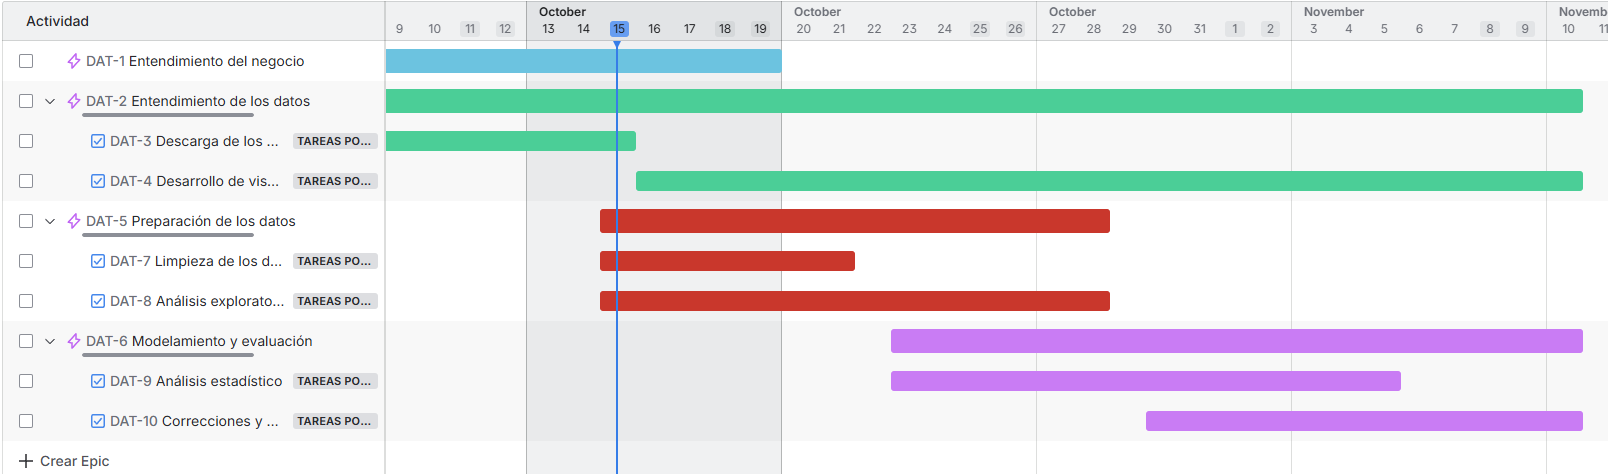


#### DAT-1. Entendimiento del negocio (9–19 de octubre)

En esta primera etapa se analiza el problema desde el punto de vista clínico y técnico. Se identifican los objetivos del modelo, las métricas de desempeño esperadas (precisión, sensibilidad, especificidad), las restricciones éticas y los posibles usos en entornos hospitalarios.

#### DAT-2. Entendimiento de los datos (9 de octubre – 9 de noviembre)

Se recopila y explora el conjunto de datos de radiografías. Se revisa la estructura, el tamaño, las etiquetas

- DAT-3: Descarga y organización de las radiografías.

- DAT-4: Desarrollo de visualizaciones iniciales para comprender la distribución de clases y características del dataset.

#### DAT-5. Preparación de los datos (14–28 de octubre)

Se realiza la limpieza, transformación y preparación del conjunto de imágenes.
Incluye:

- DAT-7: Limpieza de datos (eliminación de duplicados o imágenes corruptas).

- DAT-8: Análisis exploratorio más profundo, generación vector de características y generación de conjuntos de entrenamiento, validación y prueba.

#### DAT-6. Modelamiento y evaluación (21 de octubre – 9 de noviembre)

Se construye, entrena y evalúa el modelo de clasificación de imágenes.
Incluye:

- DAT-9: Análisis estadístico y ajuste de hiperparámetros.

- DAT-10: Corrección de errores, validación final y documentación de resultados.

## **2. Datos**

---


#Camilo

El conjunto de datos con el nombre de **Chest X-ray Dataset**, integra imágenes de tórax clasificadas en tres categorías:

**Normal**

**Neumonía**

**COVID-19**

--------------------

Importamos librerias, cargamos los datos y validamos directorios.

In [ ]:
!pip install imagehash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 10.6 MB/s eta 0:00:00


In [ ]:
!pip install scikit-image

In [ ]:
import os
from PIL import Image
import seaborn as sns
from skimage.color import rgb2gray
from skimage.feature import hog, local_binary_pattern
from skimage import exposure
import os
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
from tqdm import tqdm
import zipfile
import imagehash
import torch
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import cv2
import kagglehub
from transformers import AutoImageProcessor, AutoModel
from skimage.feature import local_binary_pattern

In [ ]:
zip_path = "/content/X-ray-dataset.zip"

extract_path = "/content/X-ray-dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Dataset extracted to: {extract_path}")

path = "/content/X-ray-dataset/X-ray-dataset"

Dataset extracted to: /content/X-ray-dataset


In [ ]:
normal_dir = os.path.join(path, 'NORMAL')
covid_dir = os.path.join(path, 'COVID')
pneumonia_dir = os.path.join(path, 'PNEUMONIA')

# Verifica que existan los directorios
print("NORMAL:", os.path.isdir(normal_dir))
print("COVID:", os.path.isdir(covid_dir))
print("PNEUMONIA:", os.path.isdir(pneumonia_dir))

NORMAL: True
COVID: True
PNEUMONIA: True


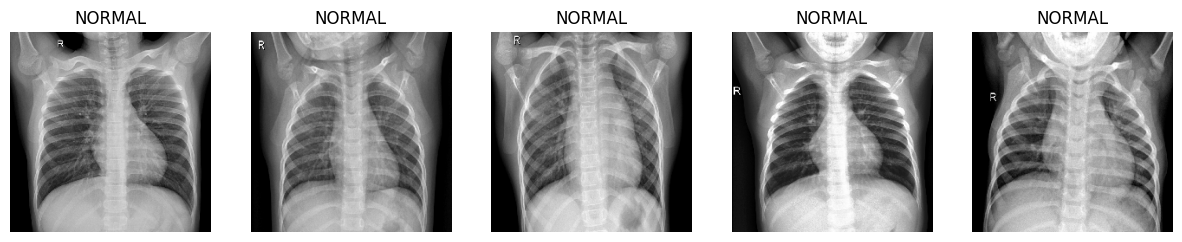

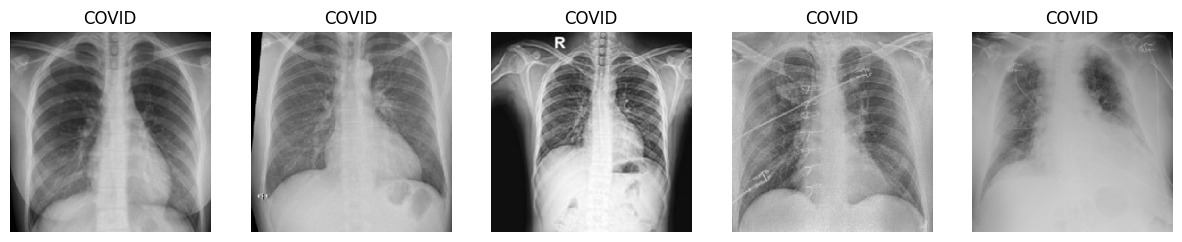

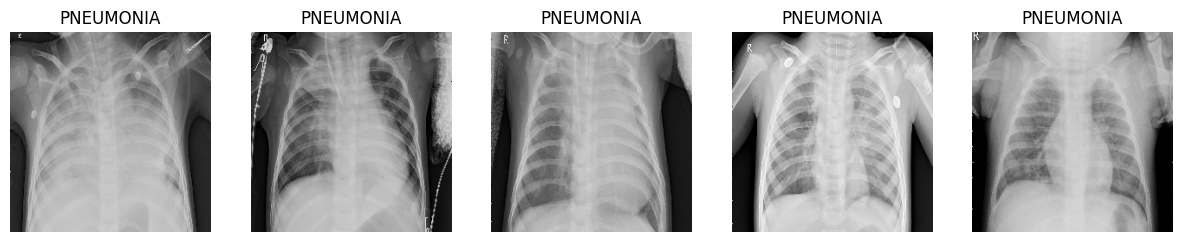

In [ ]:
def display_random_images(directory, num_images=5):
    image_files = [f for f in os.listdir(directory) if f.endswith(('.jpg', '.jpeg', '.png'))]
    if not image_files:
        print(f"No image files found in {directory}")
        return

    random_images = random.sample(image_files, min(num_images, len(image_files)))

    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(random_images):
        img_path = os.path.join(directory, img_name)
        try:
            img = Image.open(img_path)
            plt.subplot(1, num_images, i + 1)
            plt.imshow(img)
            plt.title(os.path.basename(directory))
            plt.axis('off')
        except Exception as e:
            print(f"Could not open image {img_path}: {e}")
    plt.show()

display_random_images(normal_dir)

display_random_images(covid_dir)

display_random_images(pneumonia_dir)

Usando imagen: /content/X-ray-dataset/X-ray-dataset/NORMAL/NORMAL_829.png


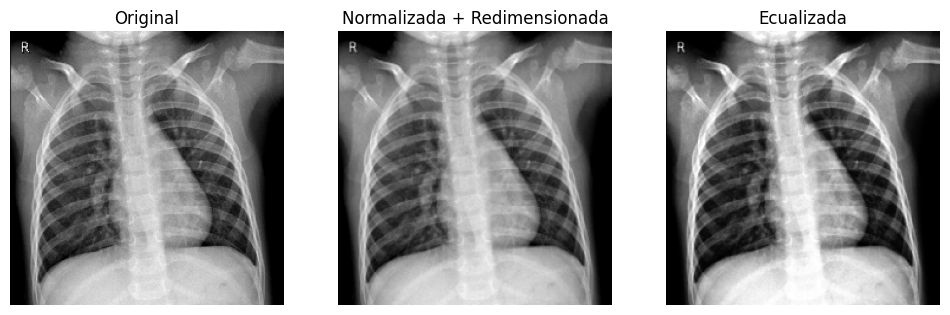

In [ ]:
# Ruta Normal
base_path = "/content/X-ray-dataset/X-ray-dataset/NORMAL"

# Selecciona una imagen aleatoria de la carpeta normal
sample_img = random.choice([f for f in os.listdir(base_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
img_path = os.path.join(base_path, sample_img)

print(f"Usando imagen: {img_path}")

#Cargar imagen en escala de grises
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

#Validar carga
if img is None:
    raise FileNotFoundError(f"No se pudo abrir la imagen: {img_path}")

#Normalizar a rango [0, 1]
img_norm = img / 255.0

#Redimensionar a tamaño uniforme (224x224)
img_resized = cv2.resize(img_norm, (224, 224))

#Aplicar ecualización de histograma
img_eq = cv2.equalizeHist((img_resized * 255).astype(np.uint8))

#Mostrar resultados
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Normalizada + Redimensionada")
plt.imshow(img_resized, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Ecualizada")
plt.imshow(img_eq, cmap='gray')
plt.axis('off')

plt.show()


Usando imagen: /content/X-ray-dataset/X-ray-dataset/COVID/COVID_910.png


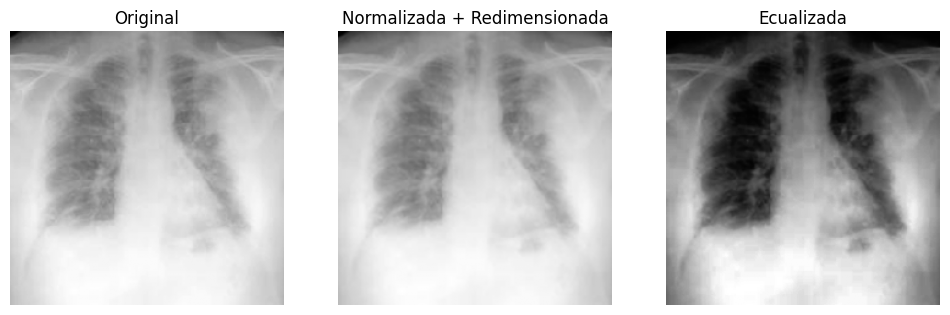

In [ ]:
# Ruta Covid
base_path = "/content/X-ray-dataset/X-ray-dataset/COVID"

# Selecciona una imagen aleatoria de la carpeta normal
sample_img = random.choice([f for f in os.listdir(base_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
img_path = os.path.join(base_path, sample_img)

print(f"Usando imagen: {img_path}")

#Cargar imagen en escala de grises
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

#Validar carga
if img is None:
    raise FileNotFoundError(f"No se pudo abrir la imagen: {img_path}")

#Normalizar a rango [0, 1]
img_norm = img / 255.0

#Redimensionar a tamaño uniforme (224x224)
img_resized = cv2.resize(img_norm, (224, 224))

#Aplicar ecualización de histograma
img_eq = cv2.equalizeHist((img_resized * 255).astype(np.uint8))

#Mostrar resultados
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Normalizada + Redimensionada")
plt.imshow(img_resized, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Ecualizada")
plt.imshow(img_eq, cmap='gray')
plt.axis('off')

plt.show()

Usando imagen: /content/X-ray-dataset/X-ray-dataset/PNEUMONIA/PNEUMONIA_881.png


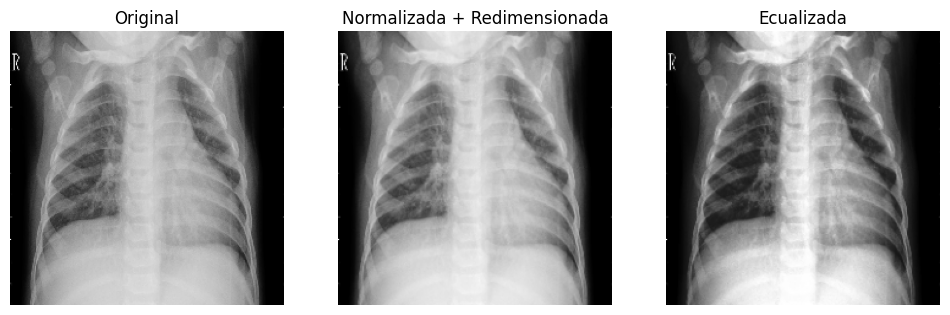

In [ ]:
# Ruta Pneumonia
base_path = "/content/X-ray-dataset/X-ray-dataset/PNEUMONIA"

# Selecciona una imagen aleatoria de la carpeta normal
sample_img = random.choice([f for f in os.listdir(base_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
img_path = os.path.join(base_path, sample_img)

print(f"Usando imagen: {img_path}")

#Cargar imagen en escala de grises
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

#Validar carga
if img is None:
    raise FileNotFoundError(f"No se pudo abrir la imagen: {img_path}")

#Normalizar a rango [0, 1]
img_norm = img / 255.0

#Redimensionar a tamaño uniforme (224x224)
img_resized = cv2.resize(img_norm, (224, 224))

#Aplicar ecualización de histograma
img_eq = cv2.equalizeHist((img_resized * 255).astype(np.uint8))

#Mostrar resultados
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Normalizada + Redimensionada")
plt.imshow(img_resized, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Ecualizada")
plt.imshow(img_eq, cmap='gray')
plt.axis('off')

plt.show()

## **2. Análisis Exploratorio de los Datos**
---

### **2.1. Resumen General**
---

- ¿Cuántos documentos tiene el dataset?

5.228
- ¿En qué formato están guartdados los datos?

.png

- ¿Qué tamaño en MB tiene el conjunto?

276.50 MB

Ahora crearemos una función diseñada para contabilizar la totalidad de archivos dentro de una carpeta dada, incluyendo sus subdirectorios, e identificar los distintos formatos de archivo existentes, y adicional el tamaño total de todas las imágenes. Aplicaremos esta herramienta a nuestra carpeta de imágenes con el fin de obtener una visión general tanto del número total de archivos que componen el conjunto de datos como de los formatos en los que se encuentran.

In [ ]:
def count_files_and_formats(folder_path):
    """Counts the total number of files and provides a count for each file extension."""
    total_files = 0
    file_extension_counts = {}
    for root, _, files in os.walk(folder_path):
        total_files += len(files)
        for filename in files:
            file_extension = os.path.splitext(filename)[1].lower()
            if file_extension:
                file_extension_counts[file_extension] = file_extension_counts.get(file_extension, 0) + 1
    return total_files, file_extension_counts

def get_size(folder_path):
    """Calculates the total size of files in a folder in bytes, including subdirectories."""
    total_size = sum(
        os.path.getsize(os.path.join(root, filename))
        for root, _, files in os.walk(folder_path)
        for filename in files
        if os.path.isfile(os.path.join(root, filename)) # Ensure it's a file
    )
    return total_size

num_image_files, image_formats_counts = count_files_and_formats(path)
total_image_size_bytes = get_size(path)
total_image_size_mb = total_image_size_bytes / (1024 ** 2)

print(f"Número total de archivos en el dataset: {num_image_files}")
print("Cantidad de archivos por formato:")
for ext, count in image_formats_counts.items():
    print(f"  {ext}: {count}")
print(f"Tamaño total del dataset de imágenes: {total_image_size_mb:.2f} MB")

Número total de archivos en el dataset: 5228
Cantidad de archivos por formato:
  .png: 5228
Tamaño total del dataset de imágenes: 276.50 MB


Se cuenta con un total de 5228 archivos de imagen en formato `.png`.
y un uso en memoria de 276.50 MB

A continuación exploraremos las dimensiones de las imágenes, ver cuales son las dimensiones más comunes, que tanto difieren estas dimensiones, y con eso podremos saber cómo tratar el procesamiento o redimensión de las imágenes para una normalización más adelante de las mismas

In [ ]:
image_dimensions = []

# Update to reflect the new directory structure
categories = ['NORMAL', 'COVID', 'PNEUMONIA']

for category in categories:
    category_dir = os.path.join(path, category)
    if not os.path.exists(category_dir):
        print(f"Category directory not found: {category_dir}")
        continue

    for filename in os.listdir(category_dir):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            file_path = os.path.join(category_dir, filename)
            try:
                with Image.open(file_path) as img:
                    width, height = img.size
                    image_dimensions.append({'filename': filename, 'width': width, 'height': height, 'category': category.lower()}) # Store category in lowercase
            except Exception as e:
                print(f"Could not process image {file_path}: {e}")

df = pd.DataFrame(image_dimensions)

print("DataFrame with image dimensions and categories:")
display(df.head())

dimension_counts = df.groupby(['width', 'height']).size().reset_index(name='count')

print("\nCantidad de imágenes por par de dimensiones (width, height):")
display(dimension_counts.sort_values(by='count', ascending=False))

mode_dimensions = df[['width', 'height']].mode()

print("\nMode of image dimensions (width, height):")
display(mode_dimensions)

print("\nDescriptive statistics of image dimensions:")
display(df[['width', 'height']].describe())

print("\nCantidad de imágenes por categoría:")
display(df['category'].value_counts())

DataFrame with image dimensions and categories:


filename  width  height category
0  NORMAL_1727.png    256     256   normal
1   NORMAL_863.png    232     232   normal
2  NORMAL_1207.png    232     232   normal
3   NORMAL_821.png    232     232   normal
4  NORMAL_1447.png    232     232   normal


Cantidad de imágenes por par de dimensiones (width, height):


width  height  count
0    232     232   4228
1    256     256   1000


Mode of image dimensions (width, height):


width  height
0    232     232


Descriptive statistics of image dimensions:


width       height
count  5228.000000  5228.000000
mean    236.590666   236.590666
std       9.440276     9.440276
min     232.000000   232.000000
25%     232.000000   232.000000
50%     232.000000   232.000000
75%     232.000000   232.000000
max     256.000000   256.000000


Cantidad de imágenes por categoría:


category
normal       1802
pneumonia    1800
covid        1626
Name: count, dtype: int64

El conjunto de datos se compone de **5,228 imágenes**.

---

##### **Las Dimensiones Más Frecuentes**

Cuenta con dos dimensiones: **4.228 de 232 * 232 y 1.000 de 256 * 256**

---

##### **Estadísticas Generales**

Al analizar todas las imágenes en conjunto, se observa que el tamaño promedio es de aproximadamente **237 píxeles de ancho y 237 píxeles de alto**.

La distribución de los tamaños muestra que la mitad de las imágenes (**la mediana**) tiene una dimensión de **232 píxeles en ancho y 232 píxeles en alto** o inferior.

### **2.2. Resumen de la Calidad de los datos**
---

- ¿Hay datos faltantes, documentos vacíos o de mala calidad?

No se identifican datos faltantes.

- ¿Existen documentos ilegibles o con problemas de codificación?

No, se identifican imagenes ilegibles.
- ¿Hay mezcla de formatos en el conjunto?

In [ ]:
for root, dirs, files in os.walk(path):
    level = root.replace(path, '').count(os.sep)
    indent = ' ' * 4 * level
    print(f"{indent} {os.path.basename(root)}/")
    subindent = ' ' * 4 * (level + 1)
    for d in dirs:
        print(f"{subindent} {d}/")

 X-ray-dataset/
     NORMAL/
     PNEUMONIA/
     COVID/
     NORMAL/
     PNEUMONIA/
     COVID/


Realizar el conteo por cada una de las divisiones y sus subcarpetas, para identificar que corresponde al tamaño correcto

In [ ]:
# Carpetas esperadas (actualizadas)
classes = ["NORMAL", "COVID", "PNEUMONIA"]

# Diccionario para guardar conteos
data_summary = {}

print("Verificando estructura del dataset...\n")

data_summary['total'] = {}
for cls in classes:
    cls_path = os.path.join(path, cls)
    if not os.path.exists(cls_path):
        print(f"Carpeta faltante: {cls_path}")
        data_summary['total'][cls] = 0
        continue

    print(f"\n{cls.upper()}:")

    # Contar imágenes válidas (extensiones comunes)
    image_files = [
        f for f in os.listdir(cls_path)
        if f.lower().endswith(('.jpg', '.jpeg', '.png'))
    ]

    count = len(image_files)
    data_summary['total'][cls] = count

    if count == 0:
        print(f"{cls}: carpeta vacía ({count} archivos)")
    else:
        print(f"{cls}: {count} imágenes")

# Mostrar resumen final
print("\nResumen de conteos por carpeta:")
for split, cls_dict in data_summary.items():
    print(f"\n{split.upper()}:")
    for cls, count in cls_dict.items():
        print(f"  - {cls}: {count}")

Verificando estructura del dataset...


NORMAL:
NORMAL: 1802 imágenes

COVID:
COVID: 1626 imágenes

PNEUMONIA:
PNEUMONIA: 1800 imágenes

Resumen de conteos por carpeta:

TOTAL:
  - NORMAL: 1802
  - COVID: 1626
  - PNEUMONIA: 1800


Se procede a verificar la calidad de las imágenes, identificando corruptas, ilegibles o vacías.

In [ ]:
def check_image_quality(base_dir, expected_exts=('.jpg', '.jpeg', '.png')): #Verifica la calidad de las imágenes dentro de un dataset estructurado y realiza un resumen

    resumen = {
        "total_imagenes": 0,
        "corruptas": 0,
        "vacias": 0,
        "extensiones_invalidas": 0,
        "modos_color": {},
        "dimensiones_invalidas": 0
    }

    print(f"\nAnalizando calidad de imágenes en: {base_dir}\n")

    for root, dirs, files in os.walk(base_dir):
        for file in tqdm(files, desc=f"Revisando {os.path.basename(root)}", leave=False):
            fpath = os.path.join(root, file)
            resumen["total_imagenes"] += 1

            # Verificar extensión
            if not file.lower().endswith(expected_exts):
                resumen["extensiones_invalidas"] += 1
                continue

            # Verificar si el archivo está vacío
            if os.path.getsize(fpath) == 0:
                resumen["vacias"] += 1
                continue

            # Intentar abrir la imagen
            try:
                img = Image.open(fpath)
                img.verify()  # valida integridad
                img = Image.open(fpath)
                modo = img.mode
                w, h = img.size

                # Registrar modo de color
                resumen["modos_color"][modo] = resumen["modos_color"].get(modo, 0) + 1

                # Verificar tamaño mínimo razonable (>32px por lado)
                if w < 32 or h < 32:
                    resumen["dimensiones_invalidas"] += 1

            except Exception as e:
                resumen["corruptas"] += 1
                continue

    print("\nVerificación completa\n")
    return resumen

In [ ]:
resultado = check_image_quality(path)

# Mostrar resumen
for k, v in resultado.items():
    print(f"{k}: {v}")



Analizando calidad de imágenes en: /content/X-ray-dataset/X-ray-dataset




Verificación completa

total_imagenes: 5228
corruptas: 0
vacias: 0
extensiones_invalidas: 0
modos_color: {'RGB': 5227, 'RGBA': 1}
dimensiones_invalidas: 0


Una vez revisado y analizado se logra identificar que tiene una estructura correcta y completa de acuerdo a la informacion de la pagina Mendeley Data de donde se extrajo la informacion, tambien se identifica una imagen con tipo de color 'RGBA', y 5.227 con tipo de color RGB (acrónimo de tres colores: rojo, verde y azul, que describe un modelo de color utilizado con mayor frecuencia en pantallas digitales).

### **2.3. Tipos de variables**
---

- ¿El conjunto de datos tiene una variable objetivo a estimar?, de ser así, ¿es una variable continúa o categórica?
- Analice la distribución de las etiquetas, identifique si hay desbalanceo de datos.
- ¿El conjunto de datos cuenta con otras variables adicionales?, de ser así, debe analizar cuáles se incorporarán en el modelo y hacer un análisis descriptivo de las mismas.

Dentro de la estructura del conjunto de datos de rayos X torácicos, la variable objetivo se encuentra definida de manera implícita por la organización de los archivos. Cada imagen está almacenada en una subcarpeta que representa una categoría médica específica, tales como “normal”, “pneumonía” y “covid”.

Por lo tanto, el nombre de la subcarpeta actúa como la etiqueta de clase asociada a cada imagen. Este esquema de organización permite que el modelo aprenda a distinguir entre los diferentes tipos de afecciones pulmonares a partir de las características visuales presentes en las imágenes.

Dado que la variable objetivo toma valores discretos y no numéricos, correspondientes a diferentes clases de diagnóstico, se clasifica como una variable de tipo categórico, propia de los problemas de clasificación supervisada en aprendizaje automático.

Seguidamente, se realiza un conteo de las imágenes presentes en cada subcarpeta del conjunto de datos, comprendiendo que cada una de ellas corresponde a una categoría diagnóstica específica, como normal, neumonía y covid.

Este proceso permite evaluar la distribución de las clases, identificando si existe un equilibrio en el número de muestras por categoría o si, por el contrario, alguna clase presenta una cantidad significativamente mayor de ejemplos que las demás. Dicho análisis es fundamental para detectar posibles desequilibrios en el dataset, los cuales pueden afectar el rendimiento y la capacidad de generalización del modelo de clasificación.


Cantidad de imágenes por categoría:


/tmp/ipython-input-2936828940.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category', data=df, palette='viridis')


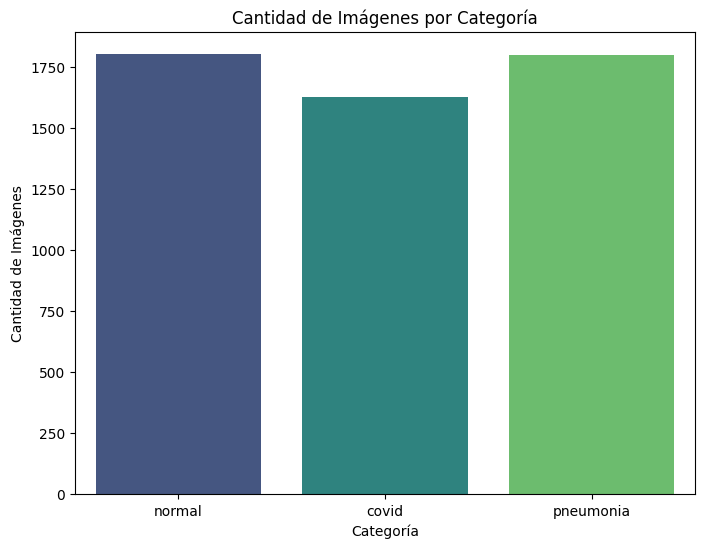

In [ ]:
print("\nCantidad de imágenes por categoría:")
#display(df['category'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(x='category', data=df, palette='viridis')
plt.title('Cantidad de Imágenes por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Imágenes')
plt.show()

Como se observa en los resultados, el conjunto de datos mantiene una representación mas amplia en la clase norma y pneumonia, se logra identificar una minima diferencia con la clase covid. Consideramos que por ser una diferencia tan minima no debe influir en el proceso de entrenamiento del modelo, ni generar un sesgo hacia las clases con mayor número de muestras.

Al igual, en etapas posteriores podría considerarse la aplicación de técnicas de balanceo de clases, tales como submuestreo (undersampling), sobremuestreo (oversampling) o el uso de pesos de clase (class weights) durante el entrenamiento, con el fin de mejorar la capacidad del modelo para generalizar correctamente entre todas las categorías diagnósticas.

### **2.4. Relación Entre Variables(pixeles)**
---

A continuación se realiza un mapa de calor de los pixeles de las imágenes por categoría para visualizar si hay alguna concentración marcada de pixeles por categoría, se realizará un redimensionamiento de las imágenes para poderlas comparar

In [ ]:
target_size = (256, 256)

category_pixel_sums = {
    'normal': np.zeros(target_size),
    'pneumonia': np.zeros(target_size),
    'covid': np.zeros(target_size) # Added covid category
}

category_counts = {
    'normal': 0,
    'pneumonia': 0,
    'covid': 0 # Added covid category
}

# Update to reflect the new directory structure
categories = ['NORMAL', 'COVID', 'PNEUMONIA']

for category in categories:
    category_dir = os.path.join(path, category)
    if not os.path.exists(category_dir):
        print(f"Category directory not found: {category_dir}")
        continue

    for filename in os.listdir(category_dir):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            file_path = os.path.join(category_dir, filename)
            try:
                # Open and resize the image
                img = Image.open(file_path).convert('L') # Convert to grayscale
                img_resized = img.resize(target_size)
                img_array = np.array(img_resized)

                # Ensure category is lowercase to match dictionary keys
                category_lower = category.lower()
                if category_lower in category_pixel_sums:
                  category_pixel_sums[category_lower] += img_array
                  category_counts[category_lower] += 1
                else:
                  print(f"Warning: Unexpected category '{category}' found.")


            except Exception as e:
                print(f"Could not process image {image_path}: {e}")

# Calculate the average pixel intensity for each category
category_average_pixels = {}
for category in category_pixel_sums:
    if category_counts[category] > 0:
        category_average_pixels[category] = category_pixel_sums[category] / category_counts[category]
    else:
        category_average_pixels[category] = np.zeros(target_size)

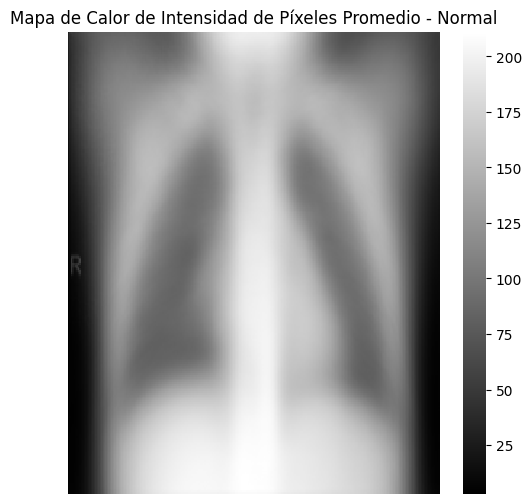

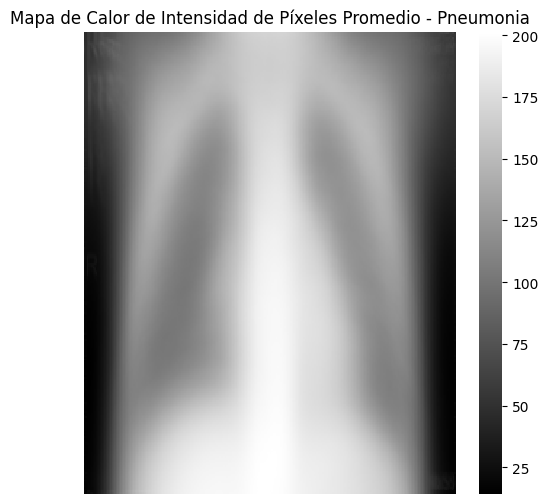

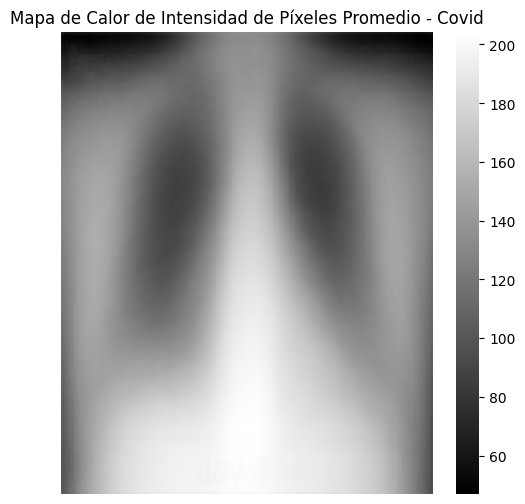

In [ ]:
# Generate heatmaps for each category
for category, avg_pixels in category_average_pixels.items():
    plt.figure(figsize=(6, 6))
    sns.heatmap(avg_pixels, cmap='gray')
    plt.title(f'Mapa de Calor de Intensidad de Píxeles Promedio - {category.capitalize()}')
    plt.axis('off')
    plt.show()

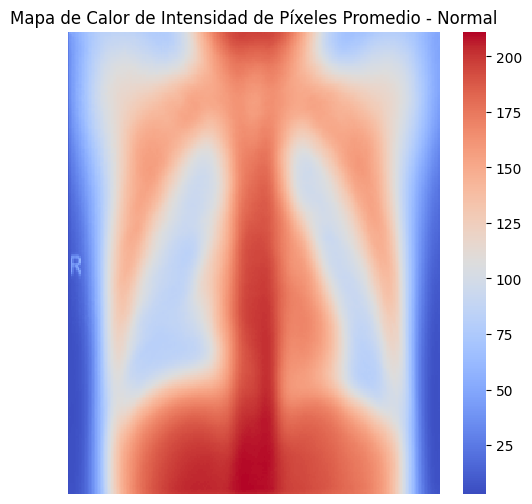

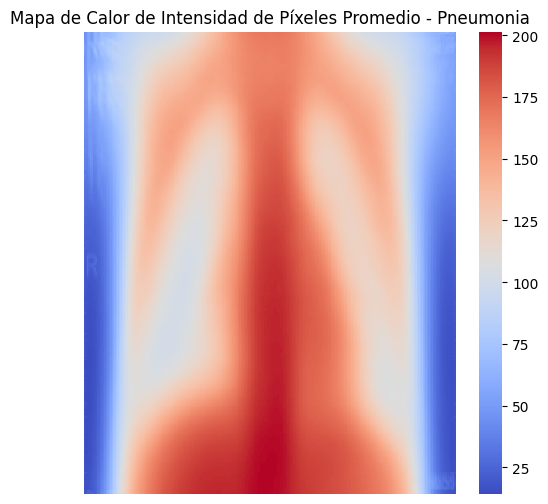

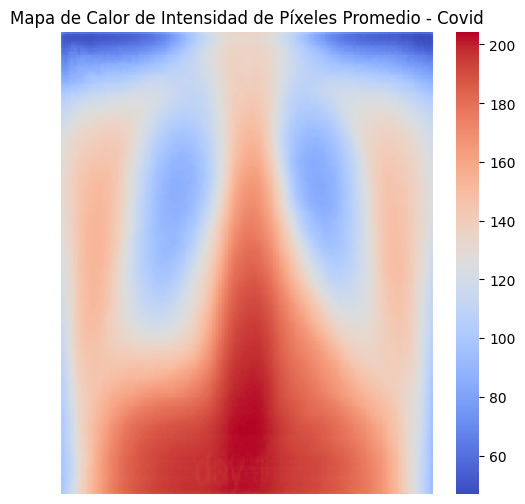

In [ ]:
# Generate heatmaps for each category
for category, avg_pixels in category_average_pixels.items():
    plt.figure(figsize=(6, 6))
    sns.heatmap(avg_pixels, cmap='coolwarm')
    plt.title(f'Mapa de Calor de Intensidad de Píxeles Promedio - {category.capitalize()}')
    plt.axis('off')
    plt.show()

Particularmente se observa ciertas diferencias en la concentración de pixeles principalmente en las imágenes de neumonía, respecto a los otros 2 grupos.

In [ ]:
image_stats = []

# Update to reflect the new directory structure
categories = ['NORMAL', 'COVID', 'PNEUMONIA']

print("Calculating image statistics...")

for category in categories:
    category_dir = os.path.join(path, category)
    if not os.path.exists(category_dir):
        print(f"Category directory not found: {category_dir}")
        continue

    for filename in tqdm(os.listdir(category_dir), desc=f"Processing {category}"):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            file_path = os.path.join(category_dir, filename)
            try:
                # Open and convert to grayscale
                img = Image.open(file_path).convert('L')
                img_array = np.array(img)

                # Calculate mean and standard deviation
                mean_intensity = np.mean(img_array)
                std_intensity = np.std(img_array)

                image_stats.append({
                    'filename': filename,
                    'category': category.lower(),
                    'mean_intensity': mean_intensity,
                    'std_intensity': std_intensity
                })

            except Exception as e:
                print(f"Could not process image {file_path}: {e}")

stats_df = pd.DataFrame(image_stats)

print("\nDescriptive statistics of image intensity:")
display(stats_df[['mean_intensity', 'std_intensity']].describe())

print("\nFirst 5 rows of the image statistics DataFrame:")
display(stats_df.head())

Calculating image statistics...


Processing PNEUMONIA: 100%|██████████| 1800/1800 [00:03<00:00, 454.36it/s]


Descriptive statistics of image intensity:


mean_intensity  std_intensity
count     5228.000000    5228.000000
mean       127.934651      56.998789
std         19.428009      11.718156
min         46.593887      14.866133
25%        115.552597      50.244445
50%        127.375613      58.587184
75%        140.405446      64.786092
max        216.498086      93.809330


First 5 rows of the image statistics DataFrame:


filename category  mean_intensity  std_intensity
0  NORMAL_1727.png   normal      110.959579      63.290571
1   NORMAL_863.png   normal      113.257487      62.493657
2  NORMAL_1207.png   normal      115.650676      55.610847
3   NORMAL_821.png   normal      115.420686      71.597083
4  NORMAL_1447.png   normal      108.990933      52.202417

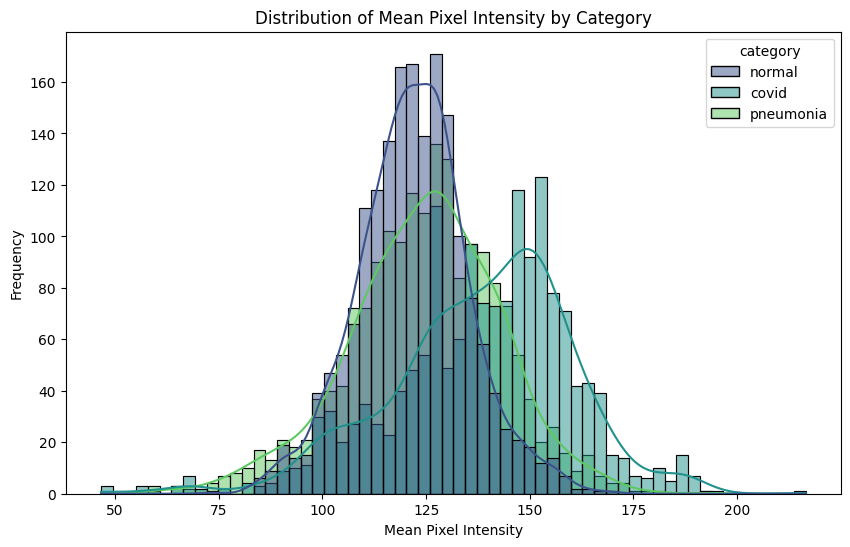

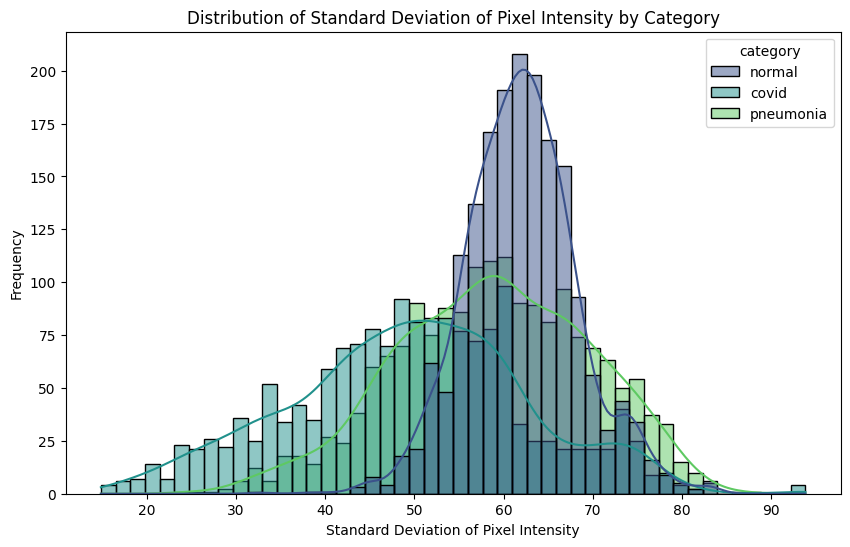

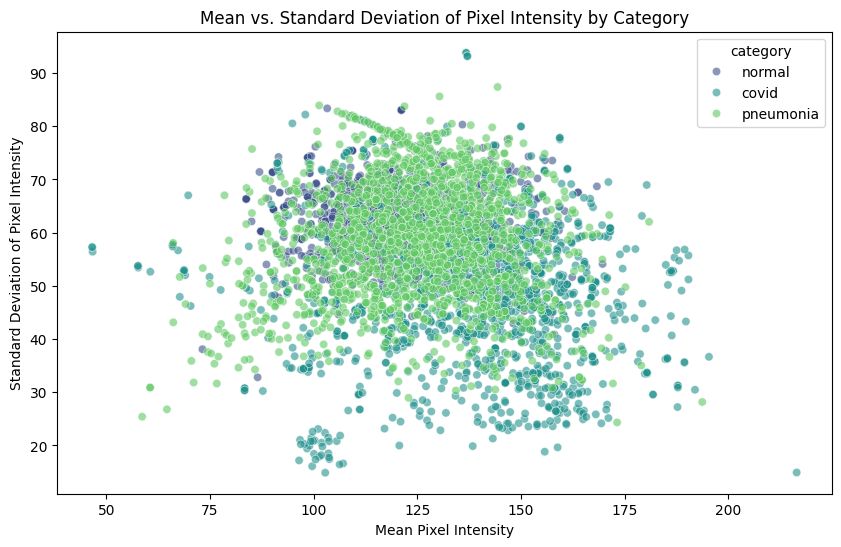

In [ ]:
# Visualize the distribution of mean intensity
plt.figure(figsize=(10, 6))
sns.histplot(data=stats_df, x='mean_intensity', hue='category', kde=True, palette='viridis')
plt.title('Distribution of Mean Pixel Intensity by Category')
plt.xlabel('Mean Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of standard deviation of intensity
plt.figure(figsize=(10, 6))
sns.histplot(data=stats_df, x='std_intensity', hue='category', kde=True, palette='viridis')
plt.title('Distribution of Standard Deviation of Pixel Intensity by Category')
plt.xlabel('Standard Deviation of Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

# Visualize the relationship between mean and standard deviation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=stats_df, x='mean_intensity', y='std_intensity', hue='category', palette='viridis', alpha=0.6)
plt.title('Mean vs. Standard Deviation of Pixel Intensity by Category')
plt.xlabel('Mean Pixel Intensity')
plt.ylabel('Standard Deviation of Pixel Intensity')
plt.show()

## Métodos de extracción de características.

A continuación se establece la viabilidad de usar para la siguiente fase algunos métodos de extacción de características, teniendo en cuenta el contexto del problema.

##HOG (Histogram of Oriented Gradients)
Calcula la distribución de orientaciones de bordes, gradientes y contornos direccionales. Es muy eficiente para detectar estructuras anatómicas (costillas, pulmones y siluetas) particularmente en radiográfias de huesos y pulmones.

##LBP (Local Binary Patterns)
Mide texturas locales (variaciones de intensidad) y el contraste entre pixeles vecinos, captura irregularidades o lesiones difusas en el tejido pulmonar logrando una clasificación, particularmente detecta neumonía o tuberculosis.

De acuerdo con las imagenes de tórax del dataset analizado, puede ser de gran utilidad **combinar ambos métodos** (**HOG y LBP**):
HOG: Extrae información estructural de los pulmones
LBP: Aporta sensibilidad a texturas irregulares asociadas a neumonía o tuberculosis

Para la **extracción con alguno de estos dos metodos** se debe realizar un preprocesamiento previo de las imagenes con el fin de garantizar la calidad y consistencia del vector de características, de la siguiente manera:
1. Conversión a escala de grises: reduce ruido cromático irrelevante
2. Redimensionamiento uniforme: normalización del tamaño ej: 128 * 128 / 224 * 224
3. Normalización de intensidades: escala los valores de pixeles
4. Eliminación de imágenes corruptas o vacías: garantiza la integridad del conjunto de datos, evitando que archivos defectuosos que distorsionen el proceso de entrenamiento.

**La combinación de HOG + LBP es especialmente adecuada para modelos tradicionales como Random Forest**, ya que ambos métodos generan vectores de características numéricos y compactos, fácilmente interpretables y de baja dimensionalidad en comparación con imágenes crudas.
Esto permite que el modelo aprenda patrones estructurales y texturales relevantes sin requerir redes neuronales profundas, logrando un equilibrio entre rendimiento, interpretabilidad y eficiencia computacional.
## GLCM:
Este método es especialmente pertinente para imágenes de rayos X de tórax ya que las patologías pulmonares (como neumonía y tuberculosis) generan alteraciones texturales en el tejido pulmonar que pueden manifestarse como cambios en la distribución espacial de intensidades.

La GLCM cuantifica la frecuencia con la que aparecen pares de niveles de gris dados un desplazamiento y una orientación específicos, lo que permite extraer características como contraste, homogeneidad, energía y entropía, las cuales reflejan la variabilidad, uniformidad y desorden de la textura

La incorporación de estas características en combinación con técnicas de aprendizaje automático o redes neuronales puede ayudar a:

- mejorar la discriminación entre clases diagnósticas al capturar diferencias sutiles de textura,

- aportar interpretabilidad clínica en función de la relación entre textura y patología,

- complementar los métodos basados únicamente en aprendizaje profundo con un componente “hand-crafted” que puede reforzar el modelo cuando los datos disponibles son limitados o presentan variabilidad.

 Pero el cálculo de GLCM requiere mayor preprocesamiento (cuantización de niveles de gris, elección de distancias/ángulos, normalización de imágenes).
## DYNOv2

DINOv2 es un **método de preentrenamiento auto-supervisado** y una **familia de modelos fundacionales de visión** basados en Vision Transformer (ViT) que aprenden **representaciones visuales universales sin etiquetas**, a gran escala y con datos curados y diversos. Sus *features* están diseñadas para funcionar “*out-of-the-box*” en múltiples tareas y dominios, sin necesidad de ajuste intensivo.

**¿Por qué es adecuado para clasificación de radiografías de tórax?**

1. **Rendimiento como extractor congelado.** Evaluaciones sistemáticas en radiología (rayos X, CT, MRI) muestran que DINOv2 ofrece **representaciones eficaces** para *k-NN*, *linear probing* y *fine-tuning* eficiente, compitiendo o superando alternativas supervisadas y *weakly-supervised*;
2. **Robustez a la variabilidad** Al entrenarse con datos diversos y curados, DINOv2 muestra **generalización transversal**, útil cuando el conjunto proviene de **múltiples fuentes ** con potencial *domain shift*.

**Consideraciones clave**

* **Preprocesamiento.** Usar *resize/center-crop* y **normalización** compatibles con ViT/DINOv2; comenzar en 224×224 y evaluar entradas mayores (p. ej., 448–518) si el cómputo lo permite.
* **Canales de color.** Las CXR son intrínsecamente en escala de grises; es práctica estándar **replicar el canal** a 3 canales para mantener compatibilidad con *backbones* RGB (alternativamente, usar directamente las imágenes RGB estandarizadas si ya vienen así).


## **3. Preparación de los Datos**

---

#David

Crear dataframe con la información de las imágenes

In [ ]:
image_dimensions = []

categories = ['NORMAL', 'COVID', 'PNEUMONIA']

for category in categories:
    category_dir = os.path.join(path, category)
    if not os.path.exists(category_dir):
        print(f"Category directory not found: {category_dir}")
        continue

    for filename in os.listdir(category_dir):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            file_path = os.path.join(category_dir, filename)
            try:
                with Image.open(file_path) as img:
                    width, height = img.size
                    image_dimensions.append({'filename': filename, 'filepath': file_path, 'width': width, 'height': height, 'category': category.lower()}) # Store category in lowercase
            except Exception as e:
                print(f"Could not process image {file_path}: {e}")

df = pd.DataFrame(image_dimensions)

display(df.head())

filename                                           filepath  width  \
0  NORMAL_1727.png  /content/X-ray-dataset/X-ray-dataset/NORMAL/NO...    256   
1   NORMAL_863.png  /content/X-ray-dataset/X-ray-dataset/NORMAL/NO...    232   
2  NORMAL_1207.png  /content/X-ray-dataset/X-ray-dataset/NORMAL/NO...    232   
3   NORMAL_821.png  /content/X-ray-dataset/X-ray-dataset/NORMAL/NO...    232   
4  NORMAL_1447.png  /content/X-ray-dataset/X-ray-dataset/NORMAL/NO...    232   

   height category  
0     256   normal  
1     232   normal  
2     232   normal  
3     232   normal  
4     232   normal

## **3 Limpieza de los Datos**
---

### **3.1 Datos corruptos**
---

* ¿Cómo se determinó la presencia de datos corruptos en el conjunto de datos?

 Se implemento un mecanismo de deteccion de imagenes corruptas o duplicadas mediante la tecnica de image hashing.Se identificaron 1.183 imagenes duplicadas
* ¿Qué medidas se tomaron para corregir o eliminar los datos corruptos?

Se tomo la decision de eliminar estas imagenes duplicadas del conjunto de datos, esta medida garantiza que cada observacion corresponda a una muestra unica, evitando sesgos.
* ¿Hubo casos en los que la corrupción de datos no pudo ser manejada y cómo se justificó esa decisión?

No se detectó corrupción de datos

Para manejar los datos corruptos se realiza una validación mediante la libreria PIL usando el método image.verify que nos permite validar la composición de la imágen, adicional se validan dimensiones, modos de color, si hay o no imágenes vacias.

In [ ]:
def check_image_quality(base_dir, expected_exts=('.jpg', '.jpeg', '.png')): #Verifica la calidad de las imágenes dentro de un dataset estructurado y realiza un resumen

    resumen = {
        "total_imagenes": 0,
        "corruptas": 0,
        "vacias": 0,
        "extensiones_invalidas": 0,
        "modos_color": {},
        "dimensiones_invalidas": 0
    }

    print(f"\nAnalizando calidad de imágenes en: {base_dir}\n")

    for root, dirs, files in os.walk(base_dir):
        for file in tqdm(files, desc=f"Revisando {os.path.basename(root)}", leave=False):
            fpath = os.path.join(root, file)
            resumen["total_imagenes"] += 1

            # Verificar extensión
            if not file.lower().endswith(expected_exts):
                resumen["extensiones_invalidas"] += 1
                continue

            # Verificar si el archivo está vacío
            if os.path.getsize(fpath) == 0:
                resumen["vacias"] += 1
                continue

            # Intentar abrir la imagen
            try:
                img = Image.open(fpath)
                img.verify()  # valida integridad
                img = Image.open(fpath)
                modo = img.mode
                w, h = img.size

                # Registrar modo de color
                resumen["modos_color"][modo] = resumen["modos_color"].get(modo, 0) + 1

                # Verificar tamaño mínimo razonable (>32px por lado)
                if w < 32 or h < 32:
                    resumen["dimensiones_invalidas"] += 1

            except Exception as e:
                resumen["corruptas"] += 1
                continue

    print("\nVerificación completa\n")
    return resumen


In [ ]:
resultado = check_image_quality(path)

# Mostrar resumen
for k, v in resultado.items():
    print(f"{k}: {v}")


Analizando calidad de imágenes en: /content/X-ray-dataset/X-ray-dataset




Verificación completa

total_imagenes: 5228
corruptas: 0
vacias: 0
extensiones_invalidas: 0
modos_color: {'RGB': 5227, 'RGBA': 1}
dimensiones_invalidas: 0


Con los resultados se evidencia que no hubieron imágenes corruptas, con dimensiones inadecuadas, o con modos de color inválidos, con lo cual a nivel general el conjunto de datos presenta buena calidad en este aspecto

### **2.2 Valores faltantes**
---
Al encontrarnos con valores faltantes en el conjunto de datos, es crucial preguntarse:
* ¿Cómo afectan estos valores a la integridad y representatividad de la información?

No se identifacaron datos faltantes en nuestro conjunto de datos, esto favorece la consistencia estadistica, representatividad de las clases y fiabilidad de las metricas.
* ¿Cómo se identificaron los valores faltantes en el conjunto de datos?

 No se identificaron valores faltantes, la verificacion se realizo en el paso anterior, en el cual se confirmo que se contenia informacion completa de las imágenes,sin registros vacios o nulos.
* ¿Cuáles fueron los criterios para decidir si rellenar con valores estimados o eliminar los valores faltantes? En caso que aplique, ¿qué método de relleno se utilizó y por qué se consideró apropiado?

Dado que no se encontraron valores faltantes, no fue necesario aplicar tecnicas de inputacion, ni eliminacion adicional de registros.
* ¿Se realizó un análisis de la distribución de los valores faltantes en relación con las variables clave? Por ejemplo, si hay valores faltantes en una variable crítica, ¿cómo podría afectar la interpretación de los resultados?

No fue necesario realizar este analisis de distribucion ni de correlacion con otras variables, ya que todas las entradas del conjunto de datos contenian informacion completa.

### **3.3 Valores duplicados**
----

* ¿Cómo se identificaron y manejaron los valores duplicados en el conjunto de datos?
* ¿Hubo alguna consideración especial al tratar duplicados en función de ciertas variables?
* ¿Pueden estos duplicados sesgar el análisis, y en qué medida?
* ¿Se justifica la eliminación de duplicados para mantener la coherencia y singularidad de los datos?
* ¿Cómo se aseguró de que la eliminación de duplicados no afectara negativamente la representación del conjunto de datos?


Para evitar redundancias y sesgos, implementamos una detección de duplicados basada en  image hash  del contenido binario de cada archivo. Un hash es una huella digital única generada a partir de los datos exactos del archivo, asegurando que si dos archivos tienen el mismo hash, son idénticos bit a bit. Este método nos permite identificar y eliminar eficientemente copias exactas, sin importar si tienen nombres diferentes o están en distintas ubicaciones. En nuestro caso usamos image hash que a diferencia del hash común como MD5, identifica imágenes similares, de esta manera podemos identificar de mejor manera los duplicados

In [ ]:
hashes = {}
duplicate_files = []
hash_size = 8 # You can adjust the hash size as needed

print("\nBuscando imágenes duplicadas en el DataFrame\n")

for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Calculando hashes de imágenes"):
    image_path = row['filepath']
    try:
        with Image.open(image_path) as img:
            # Convert to RGB to ensure consistent hashing across different image types
            img = img.convert('RGB')
            img_hash = imagehash.average_hash(img, hash_size=hash_size)

            if img_hash in hashes:
                hashes[img_hash].append(image_path)
                duplicate_files.append(image_path)
            else:
                hashes[img_hash] = [image_path]
    except Exception as e:
        print(f"Could not process image {image_path} for hashing: {e}")

# Filter out hashes with only one image
duplicates = {hash_val: files for hash_val, files in hashes.items() if len(files) > 1}

print("\nBúsqueda de duplicados completa.\n")
len(duplicates)
total = 0
for k, v in duplicates.items():
  total += len(v)
print(f"Número total de archivos duplicados encontrados: {total}\n")

# Add a 'duplicates' column to the DataFrame
df['duplicates'] = df['filepath'].apply(lambda x: x in duplicate_files)

if duplicates:
    print("Duplicados:")
    for hash_val, file_list in duplicates.items():
        print(f"Hash: {hash_val}")
        for file_path in file_list:
            print(file_path)
        print("-" * 20)


Buscando imágenes duplicadas en el DataFrame



Calculando hashes de imágenes: 100%|██████████| 5228/5228 [00:18<00:00, 284.05it/s]



Búsqueda de duplicados completa.

Número total de archivos duplicados encontrados: 1721

Duplicados:
Hash: 987e7a5a5c1c3c7e
/content/X-ray-dataset/X-ray-dataset/NORMAL/NORMAL_1727.png
/content/X-ray-dataset/X-ray-dataset/NORMAL/NORMAL_1609.png
/content/X-ray-dataset/X-ray-dataset/NORMAL/NORMAL_142.png
/content/X-ray-dataset/X-ray-dataset/NORMAL/NORMAL_94.png
/content/X-ray-dataset/X-ray-dataset/NORMAL/NORMAL_188.png
--------------------
Hash: 7e7e5a5a181c3c7e
/content/X-ray-dataset/X-ray-dataset/NORMAL/NORMAL_1085.png
/content/X-ray-dataset/X-ray-dataset/NORMAL/NORMAL_431.png
/content/X-ray-dataset/X-ray-dataset/PNEUMONIA/PNEUMONIA_757.png
--------------------
Hash: 387e7e5a1e1c3c7e
/content/X-ray-dataset/X-ray-dataset/NORMAL/NORMAL_185.png
/content/X-ray-dataset/X-ray-dataset/NORMAL/NORMAL_91.png
/content/X-ray-dataset/X-ray-dataset/NORMAL/NORMAL_1603.png
/content/X-ray-dataset/X-ray-dataset/NORMAL/NORMAL_1724.png
/content/X-ray-dataset/X-ray-dataset/NORMAL/NORMAL_1604.png
----------

Como resultado obtuvimos que hay un total de 1721 imágenes duplicadas. A continuación vamos a proceder a marcar los archivos que debemos eliminar pues están duplicados, si hay duplicidad con diferente etiqueta de clasificación procederemos a eliminar los registros asociados, pues no tendríamos una fuente de verdad para determinar cual es la verdadera categoría. Caso contrario donde los duplicados asociados a un mismo hash sean todos de la misma clase, procedemos a eliminar todos a excepción del primero, para dejar un único elemento asociado a ese hash

In [ ]:
files_to_remove = set()
mixed_category_hashes_count = 0

for hash_val, file_list in duplicates.items():
    categories_in_group = df[df['filepath'].isin(file_list)]['category'].unique()
    if len(file_list) > 1:
        if len(categories_in_group) > 1:
            # Mixed categories, mark all for removal
            mixed_category_hashes_count += 1
            for filepath in file_list:
                files_to_remove.add(filepath)
        else:
            # Same category, keep only the first one, mark the rest for removal
            files_to_remove.update(file_list[1:])

# Update the 'duplicates' column in the DataFrame
df['duplicates'] = df['filepath'].apply(lambda x: x in files_to_remove)

print(f"Number of files marked for removal based on duplicate and category check: {len(files_to_remove)}")
print(f"Number of imagehash groups with mixed categories: {mixed_category_hashes_count}")

Number of files marked for removal based on duplicate and category check: 1183
Number of imagehash groups with mixed categories: 35


Como vemos se requieren eliminar 1183 archivos, adicional 35 grupos de hash de duplicados tenian elementos con categorías de clasificación distintas, los elementos de estos grupos serán eliminados por completo.

A continuación visualizamos un par de archivos duplicados

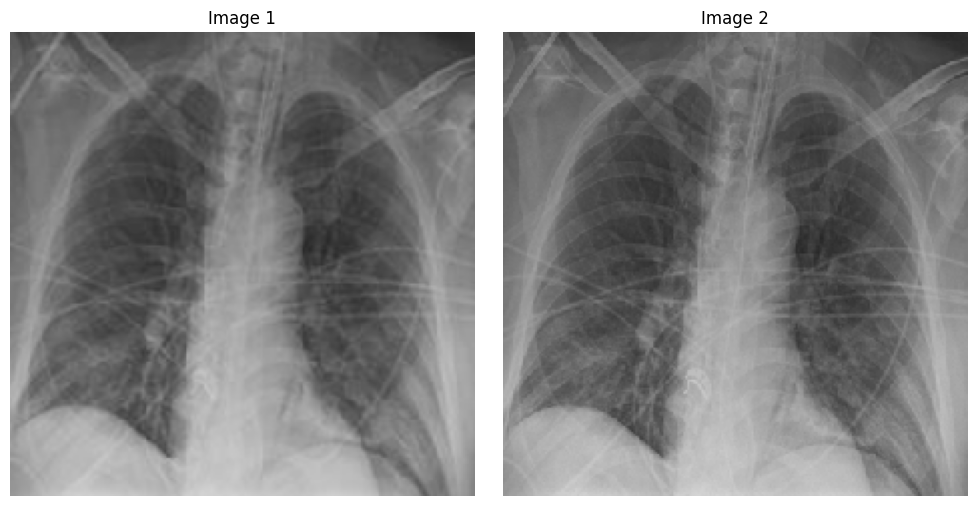

In [ ]:
image_path_1 = '/content/X-ray-dataset/COVID/COVID_458.png'
image_path_2 = '/content/X-ray-dataset/COVID/COVID_1037.png'

try:
    img1 = Image.open(image_path_1)
    img2 = Image.open(image_path_2)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img1, cmap='gray')
    plt.title('Image 1')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img2, cmap='gray')
    plt.title('Image 2')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print("One or both of the image files were not found.")
except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
df[df["duplicates"]]

filename                                           filepath  \
5        NORMAL_1085.png  /content/X-ray-dataset/X-ray-dataset/NORMAL/NO...   
22       NORMAL_1609.png  /content/X-ray-dataset/X-ray-dataset/NORMAL/NO...   
34        NORMAL_222.png  /content/X-ray-dataset/X-ray-dataset/NORMAL/NO...   
40        NORMAL_819.png  /content/X-ray-dataset/X-ray-dataset/NORMAL/NO...   
58         NORMAL_91.png  /content/X-ray-dataset/X-ray-dataset/NORMAL/NO...   
...                  ...                                                ...   
5189  PNEUMONIA_1584.png  /content/X-ray-dataset/X-ray-dataset/PNEUMONIA...   
5200  PNEUMONIA_1625.png  /content/X-ray-dataset/X-ray-dataset/PNEUMONIA...   
5201  PNEUMONIA_1643.png  /content/X-ray-dataset/X-ray-dataset/PNEUMONIA...   
5221    PNEUMONIA_22.png  /content/X-ray-dataset/X-ray-dataset/PNEUMONIA...   
5223  PNEUMONIA_1583.png  /content/X-ray-dataset/X-ray-dataset/PNEUMONIA...   

      width  height   category  duplicates  
5       232     232     normal        True  
22      256     256     normal        True  
34      232     232     normal        True  
40      232     232     normal        True  
58      232     232     normal        True  
...     ...     ...        ...         ...  
5189    256     256  pneumonia        True  
5200    256     256  pneumonia        True  
5201    256     256  pneumonia        True  
5221    232     232  pneumonia        True  
5223    256     256  pneumonia        True  

[1183 rows x 6 columns]

---

Ahora veamos la distribución de las categorías antes y después de eliminar los registros duplicados
---

In [ ]:
df["category"].value_counts()

category
normal       1802
pneumonia    1800
covid        1626
Name: count, dtype: int64

In [ ]:
df_without_duplicates = df[~df["duplicates"]]

Total number of images in the original DataFrame: 5228
Category distribution in the original DataFrame:


category
normal       1802
pneumonia    1800
covid        1626
Name: count, dtype: int64

/tmp/ipython-input-3894349890.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category', data=df, palette='viridis', legend=False)


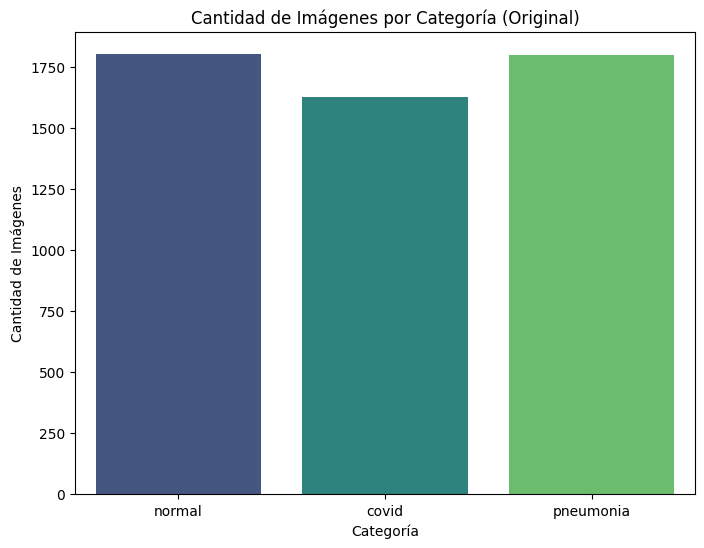


Total number of images in the DataFrame without duplicates: 4045
Category distribution in the DataFrame without duplicates:


category
pneumonia    1612
normal       1334
covid        1099
Name: count, dtype: int64

/tmp/ipython-input-3894349890.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category', data=df_without_duplicates, palette='viridis', legend=False)


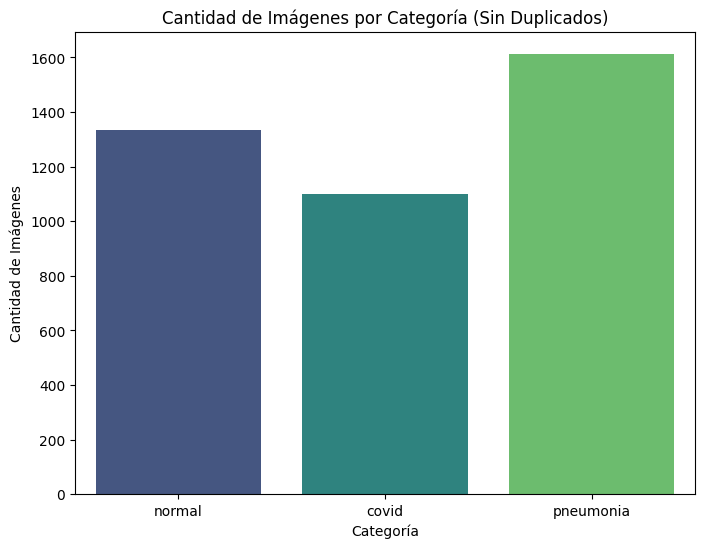

In [ ]:
print(f"Total number of images in the original DataFrame: {len(df)}")
print("Category distribution in the original DataFrame:")
display(df['category'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(x='category', data=df, palette='viridis', legend=False)
plt.title('Cantidad de Imágenes por Categoría (Original)')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Imágenes')
plt.show()

print(f"\nTotal number of images in the DataFrame without duplicates: {len(df_without_duplicates)}")
print("Category distribution in the DataFrame without duplicates:")
display(df_without_duplicates['category'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(x='category', data=df_without_duplicates, palette='viridis', legend=False)
plt.title('Cantidad de Imágenes por Categoría (Sin Duplicados)')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Imágenes')
plt.show()

Como podemos observar pasamos de 5228 imágenes a 4045 imágenes una vez eliminados los duplicados, adicional observamos que se genera un imbalance pequeño de clases respecto a la distribución inicial

- **pneumonia = 1.612**
- **normal = 1.334**
- **covid = 1.099**

### **3.4 Valores atípicos**
---
Al abordar valores atípicos, es relevante cuestionarse sobre la naturaleza de estos puntos extremos.
* ¿Son errores de medición o representan información válida pero excepcional?

No se identificaron valores atípicos (outliers), apesar de usar dos metodos, un metodo de rangos (simple) para eliminar errores obvios y posteriormente se aplico el metodo IsolationForest.
* ¿Qué criterios o técnicas se utilizaron para identificar los valores atípicos?

Se uso una regla fija basada en estadistica descriptiva, la cual usa valores numericos simples (área y aspecto) y aplica limites determinados, tambien se aplico un modelo de aprendizaje automatico no supervisado llamado Isolation Forest que aprende automáticamente qué registros son raros, basandose en múltiples caracteristicas combinadas a partir de árboles de desicion aleatorios.
Se aclara que en los dos procesos se identifico la ausencia de valores atípicos (outliers)
* ¿Se aplicaron métodos estadísticos o visuales para detectar los valores atípicos?

Se aplico un metodo estadistico basico de exploracion y control de calidad de imagenes, en donde su objeto es detectar posibles valores atipicos (outliers) a partir de la dimension de las imagenes
* ¿Cuál fue la decisión final sobre cómo tratar los valores atípicos y por qué?

Al no tener datos atipicos, se procedio con la limpieza del dataframe.

---


Se calcularon métricas geométricas básicas de cada imagen —ancho, alto, área (width * height) y relación de aspecto (width/height)— con el fin de identificar imágenes deformadas, incompletas o con resoluciones inusuales.

**Metodo estadistico**

Filtro por cuantiles: eliminación de valores fuera del rango percentil 1–99 para el área.

Filtro por proporción de aspecto: eliminación de imágenes con relación width/height fuera del rango [0.9, 1.1], asumiendo que las imágenes debían ser casi cuadradas.

In [ ]:
df_without_duplicates = df_without_duplicates.copy()

# calcular métricas
df_without_duplicates['area'] = df_without_duplicates['width'] * df_without_duplicates['height']
df_without_duplicates['aspect'] = df_without_duplicates['width'] / df_without_duplicates['height']

# definir rangos esperados
area_min, area_max = df_without_duplicates['area'].quantile([0.01, 0.99])
aspect_min, aspect_max = 0.9, 1.1  # tolerancia para imágenes no perfectamente cuadradas

# filtrar valores atípicos
mask_area = (df_without_duplicates['area'] >= area_min) & (df_without_duplicates['area'] <= area_max)
mask_aspect = (df_without_duplicates['aspect'] >= aspect_min) & (df_without_duplicates['aspect'] <= aspect_max)

df_clean = df_without_duplicates[mask_area & mask_aspect]
print(f"Registros después de limpiar por tamaño: {len(df_clean)}")

Registros después de limpiar por tamaño: 4045


De acuerdo con el resultado se evidencia que las imagenes tienen una estructura uniforme, lo cual nos indica la ausencia de valores atipicos por tamaño y forma

Modelo de aprendizaje automatico no supervisado Isolation Forest, para identificar valores atipicos.

In [ ]:
from sklearn.ensemble import IsolationForest

feat_cols = ['width', 'height', 'area', 'aspect']
clf_iso = IsolationForest(contamination=0.01, random_state=42)
is_out = clf_iso.fit_predict(df_clean[feat_cols])

df_clean['outlier'] = (is_out == -1)
df_clean = df_clean[~df_clean['outlier']]
print(f"Imágenes finales tras limpieza avanzada: {len(df_clean)}")

Imágenes finales tras limpieza avanzada: 4045


### **3.5 Resultado de limpieza**
La limpieza redujo el conjunto a un subconjunto mas homgeneo, eliminando imagenes duplicadas. Este proceso fue esencial para evitar que imágenes mal formateadas afectaran los descriptores visuales (HOG, LBP o embeddings de DINOv2), los cuales dependen de una estructura de píxeles coherente.

Las acciones de limpieza aplicadas garantizaron que el conjunto de datos final estuviera libre de duplicados, consistente en dimensiones y completo en información, asegurando la calidad necesaria para la extracción de características por medio de los metodos (HOG, LBP, DINOv2) y el posterior entrenamiento de modelos de clasificación

### **3.6 Selección de datos**
---

* ¿Qué criterios se utilizaron para seleccionar los datos relevantes para el análisis?
* ¿Se aplicaron técnicas de muestreo o filtrado para reducir el tamaño del conjunto de datos?
* ¿Cómo se justificó la inclusión o exclusión de ciertas variables en la selección de datos?

Para la selección de datos vamos a explorar distintas estrategias de selección de características, de acuerdo a cada estrategía se realizará un preprocesamiento incial de los datos, para nuestro caso las librerias usadas ya implementan el procesamiento de estos datos para su estandarización antes de generar las características.

#### DinoV2:
Como vimos en la anterior fase, es un **método de preentrenamiento auto-supervisado** y una **familia de modelos fundacionales de visión** basados en Vision Transformer (ViT) que aprenden **representaciones visuales universales sin etiquetas**, a gran escala y con datos curados y diversos. Sus *features* están diseñadas para funcionar “*out-of-the-box*” en múltiples tareas y dominios, sin necesidad de ajuste intensivo.

Vamos a utilizar el modelo DINOv2 pre-entrenado para extraer características de nuestras imágenes. DINOv2 es un modelo de visión por computadora que ha sido entrenado de manera auto-supervisada en un gran conjunto de datos de imágenes.

Las características principales de DINOv2 son:
1. No requiere etiquetas para su pre-entrenamiento
2. Genera representaciones visuales robustas y transferibles
3. Es eficiente en términos de recursos computacionales
4. Funciona bien en una amplia variedad de tareas downstream

El proceso será:
1. Cargar el modelo pre-entrenado
2. Procesar cada imagen a través del modelo(la libreria ya incluye estandarización)
4. Guardar las características para su uso posterior

---
El procesamiento se realizó a nivel local haciendo uso de una GPU RTX 4070 version Laptop, en base a esto se ajusto el batch size y otras configuraciones. El proceso se realizó en base a las herramientas dispuestas por Hugging Face en particular se tomó de referencia la siguiente [documentación](https://huggingface.co/docs/transformers/model_doc/dinov2). En caso de querer ejecutar en Colab se recomienda hacer el uso de la capa gratuita de GPU que ofrece

In [ ]:
#Configuración del Modelo
# Usaremos un modelo DINOv2 ViT-Base público de Hugging Face.
model_name = "facebook/dinov2-base"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")

processor = AutoImageProcessor.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name).to(device)
model.eval()

Usando dispositivo: cpu


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/436 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


config.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Dinov2Model(
  (embeddings): Dinov2Embeddings(
    (patch_embeddings): Dinov2PatchEmbeddings(
      (projection): Conv2d(3, 768, kernel_size=(14, 14), stride=(14, 14))
    )
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): Dinov2Encoder(
    (layer): ModuleList(
      (0-11): 12 x Dinov2Layer(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attention): Dinov2Attention(
          (attention): Dinov2SelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
          )
          (output): Dinov2SelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
        )
        (layer_scale1): Dinov2LayerScale()
        (drop_path): Identity()
        (norm2): LayerNorm((768,), eps=1e-06,

In [ ]:
#2.3 Extracción de Características en Lotes (Batch Processing)
batch_size = 16 # Ajusta según la VRAM de tu GPU
all_features = []
class_names = df_clean['category'].unique()

print("Iniciando la extracción de características...")
# Usamos tqdm para una barra de progreso
for i in tqdm(range(0, len(df_clean), batch_size)):
    batch_df = df_clean.iloc[i:i+batch_size]

    images = []
    valid_labels = []
    valid_paths = []

    for idx, row in batch_df.iterrows():
        try:
            # Cargar la imagen y asegurarse de que esté en formato RGB
            img = Image.open(row['filepath']).convert('RGB')
            images.append(img)
        except FileNotFoundError:
            print(f"Advertencia: No se encontró el archivo {row['filepath']}. Saltando.")
            continue

    if not images:
        continue

    # Procesar el lote de imágenes
    inputs = processor(images=images, return_tensors="pt").to(device)

    # Realizar la inferencia sin cálculo de gradientes para ahorrar memoria y tiempo
    with torch.no_grad():
        outputs = model(**inputs)

    # La salida 'last_hidden_state' tiene la forma (batch_size, sequence_length, hidden_size)
    # El primer token (índice 0) es el token [CLS], que contiene la representación global
    # Extraemos el token CLS para cada imagen en el lote
    batch_features = outputs.last_hidden_state[:, 0, :]

    # Mover las características a la CPU y convertirlas a NumPy
    all_features.append(batch_features.cpu().numpy())

# Verificar que hay resultados antes de apilar
if len(all_features) == 0:
    raise RuntimeError("No se extrajeron características: all_features está vacío. Verifica paths y que las imágenes se carguen correctamente.")

# Concatenar los resultados de todos los lotes
features_array = np.vstack(all_features)
features_df_features = pd.DataFrame(features_array, columns=[f'feature_{i}' for i in range(features_array.shape[1])])
features_df_meta = df_clean[["filepath", "category"]].reset_index(drop=True)
features_df = pd.concat([features_df_meta.reset_index(drop=True), features_df_features.reset_index(drop=True)], axis=1)

#4.  Guardar el DataFrame en formato CSV
csv_file = 'dinov3_chest_xray_features.csv'
features_df.to_csv(csv_file, index=False)


Iniciando la extracción de características...


100%|██████████| 253/253 [1:00:44<00:00, 14.41s/it]


In [ ]:
print(f"\nExtracción completada.")
print(f"Forma del array de características: {features_array.shape}")
print(f"Número de filas en el DataFrame: {len(features_df)}")
print(f"DataFrame guardado en '{csv_file}'")


Extracción completada.
Forma del array de características: (4045, 768)
Número de filas en el DataFrame: 4045
DataFrame guardado en 'dinov3_chest_xray_features.csv'


Las características extraídas por DINOv2 representan una transformación de nuestras imágenes de rayos X a un espacio de alta dimensionalidad (768 dimensiones). Este proceso de extracción de características nos ha permitido:

- **Reducción de dimensionalidad**: De imágenes completas a vectores de 768 dimensiones
- **Representación semántica**: Captura patrones visuales relevantes para la clasificación
- **Estandarización**: Todas las imágenes, independientemente de su tamaño original, se transforman en vectores de la misma dimensión

**Estructura del Dataset Resultante**
El dataset resultante (`dinov3_chest_xray_features.csv`) contiene:
- Total de características: 768 columnas numéricas (feature_0 a feature_767)
- Metadatos: filepath y category
- Formato: Cada fila representa una imagen, cada columna una característica extraída

y ya con este vector de características podemos entrenar nuestros modelos de clasificación.

In [ ]:
dinov3_chest_xray_features = pd.read_csv('dinov3_chest_xray_features.csv')
dinov3_chest_xray_features.head()

filepath category  feature_0  \
0  /content/X-ray-dataset/X-ray-dataset/NORMAL/NO...   normal  -0.242855   
1  /content/X-ray-dataset/X-ray-dataset/NORMAL/NO...   normal  -0.218802   
2  /content/X-ray-dataset/X-ray-dataset/NORMAL/NO...   normal  -1.002284   
3  /content/X-ray-dataset/X-ray-dataset/NORMAL/NO...   normal  -1.018898   
4  /content/X-ray-dataset/X-ray-dataset/NORMAL/NO...   normal  -0.163484   

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0  -0.703234  -0.631465   1.142371  -2.087176   0.650142   2.113006   
1  -1.005492  -0.499492   0.810335  -1.919661   0.137440   2.214584   
2  -0.544053  -0.809799   0.939384  -1.955904  -0.340190   1.658607   
3  -0.688658  -1.701291   1.379275  -1.966740   0.034049   1.539034   
4  -0.666680  -0.721860   0.897963  -2.144803   0.382515   1.783749   

   feature_7  ...  feature_758  feature_759  feature_760  feature_761  \
0  -1.885899  ...    -1.655748     0.498076    -2.955245     0.714879   
1  -1.960456  ...    -2.254223     0.852392    -2.630657     0.738262   
2  -1.723506  ...    -1.868615     1.163580    -2.583058     1.019367   
3  -2.138925  ...    -1.924772     1.643176    -2.377857     0.357311   
4  -1.349206  ...    -2.018994     0.091465    -2.942351     0.412068   

   feature_762  feature_763  feature_764  feature_765  feature_766  \
0     0.952809    -1.639261    -1.193530    -3.225330     1.232887   
1     0.964468    -1.717199    -1.139209    -3.592722     1.222495   
2     0.650936    -2.011776    -0.585460    -3.449717     1.201234   
3     1.471046    -2.762309    -0.573366    -3.371943     1.041805   
4     1.315956    -2.519565    -0.714289    -3.334394     1.725892   

   feature_767  
0    -2.582240  
1    -2.015398  
2    -2.667024  
3    -2.144044  
4    -2.568882  

[5 rows x 770 columns]

In [ ]:
dinov3_chest_xray_features.columns

Index(['filepath', 'category', 'feature_0', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       ...
       'feature_758', 'feature_759', 'feature_760', 'feature_761',
       'feature_762', 'feature_763', 'feature_764', 'feature_765',
       'feature_766', 'feature_767'],
      dtype='object', length=770)

Adicional vamos a ejecutar una transformación del vector de caracteristicas usando PCA y visualizaremos la representación en 2 dimensiones. Usando distintos métodos de PCA

Cargadas 4045 muestras con dimensión de feature = 768

Varianza explicada por cada componente principal (PCA):
PC1: 17.30%
PC2: 7.96%
Total: 25.25%


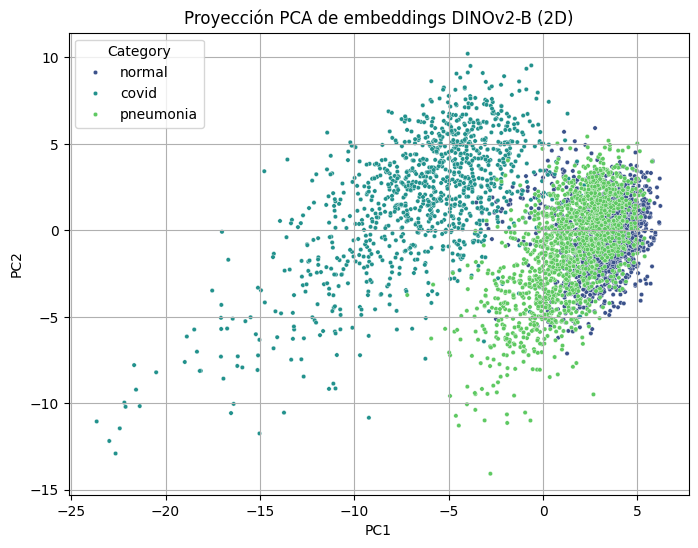

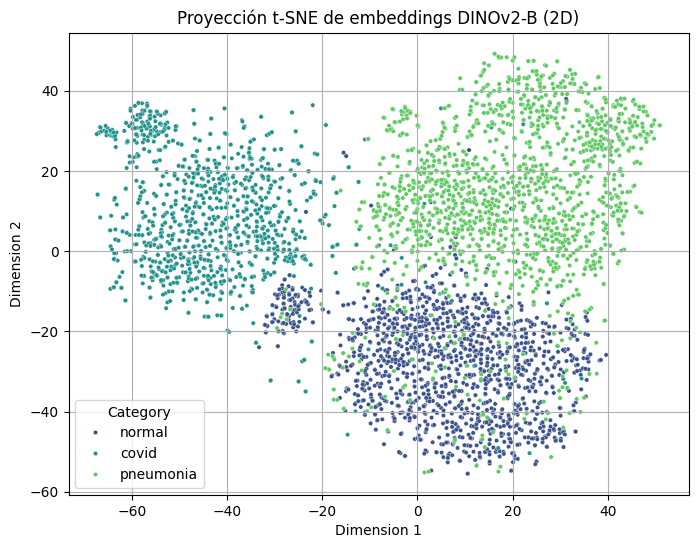

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


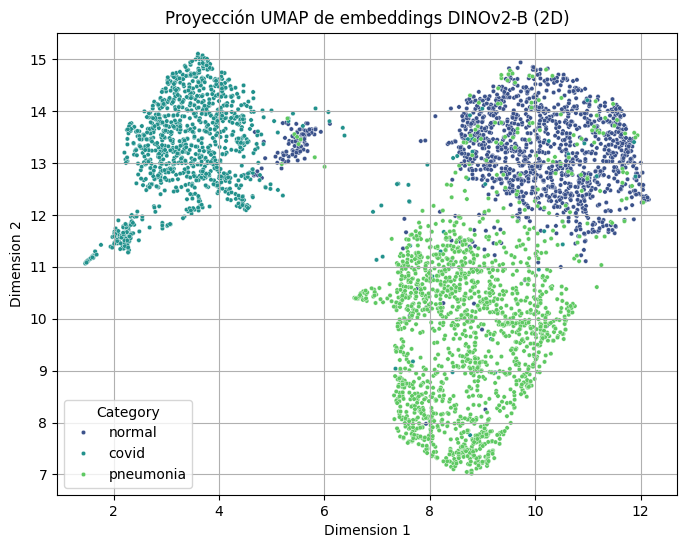

In [ ]:
#Visualización: Proyección PCA 2D de los embeddings DINOv2


# Archivos de features guardados
csv_file = 'dinov3_chest_xray_features.csv'

# Cargar features (preferir CSV para obtener filepath y labels)
if os.path.exists(csv_file):
    df_features = pd.read_csv(csv_file)
    feature_cols = [c for c in df_features.columns if c.startswith('feature_')]
    if len(feature_cols) == 0:
        raise RuntimeError('No se encontraron columnas que empiecen con "feature_" en el CSV.')
    features = df_features[feature_cols].values
    filepaths = df_features['filepath'].values if 'filepath' in df_features.columns else None
    labels = df_features['category'].values if 'category' in df_features.columns else None
else:
    raise FileNotFoundError('No se encontró ni el CSV ni el NPZ de características. Ejecuta la celda de extracción primero.')

print(f"Cargadas {features.shape[0]} muestras con dimensión de feature = {features.shape[1]}")

# Use numpy arrays directly
embeddings = features

# Reduce to 2D with PCA
pca = PCA(n_components=2)
embeddings_pca_2d = pca.fit_transform(embeddings)

# Calculate explained variance
print(f"\nVarianza explicada por cada componente principal (PCA):")
print(f"PC1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"PC2: {pca.explained_variance_ratio_[1]:.2%}")
print(f"Total: {sum(pca.explained_variance_ratio_):.2%}")

# Add PCA components to DataFrame for plotting
df_features['pca_pc1'] = embeddings_pca_2d[:, 0]
df_features['pca_pc2'] = embeddings_pca_2d[:, 1]

# Draw PCA projection using seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pca_pc1', y='pca_pc2', hue='category', data=df_features, palette='viridis', s=10)
plt.title('Proyección PCA de embeddings DINOv2-B (2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Category')
plt.grid(True)
plt.show()

# Reduce to 2D with t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne_2d = tsne.fit_transform(embeddings)

# Add t-SNE components to DataFrame for plotting
df_features['tsne_dim1'] = embeddings_tsne_2d[:, 0]
df_features['tsne_dim2'] = embeddings_tsne_2d[:, 1]

# Draw t-SNE projection using seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tsne_dim1', y='tsne_dim2', hue='category', data=df_features, palette='viridis', s=10)
plt.title('Proyección t-SNE de embeddings DINOv2-B (2D)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(title='Category')
plt.grid(True)
plt.show()

# Reduce to 2D with UMAP
reducer = umap.UMAP(random_state=42)
embeddings_umap_2d = reducer.fit_transform(embeddings)

# Add UMAP components to DataFrame for plotting
df_features['umap_dim1'] = embeddings_umap_2d[:, 0]
df_features['umap_dim2'] = embeddings_umap_2d[:, 1]

# Draw UMAP projection using seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='umap_dim1', y='umap_dim2', hue='category', data=df_features, palette='viridis', s=10)
plt.title('Proyección UMAP de embeddings DINOv2-B (2D)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(title='Category')
plt.grid(True)
plt.show()

Podemos observar que usando T-SNE y UMAP sobre el vector de caracteristicas se logra ver cierta separación entre las categorías.

Sin embargo vamos a graficar una curva que nos indique una cantidad más optima de componente principales que nos separen o aumenten la varianza de los datos para PCA clásico.

Cargadas 4045 muestras con dimensión de feature = 768


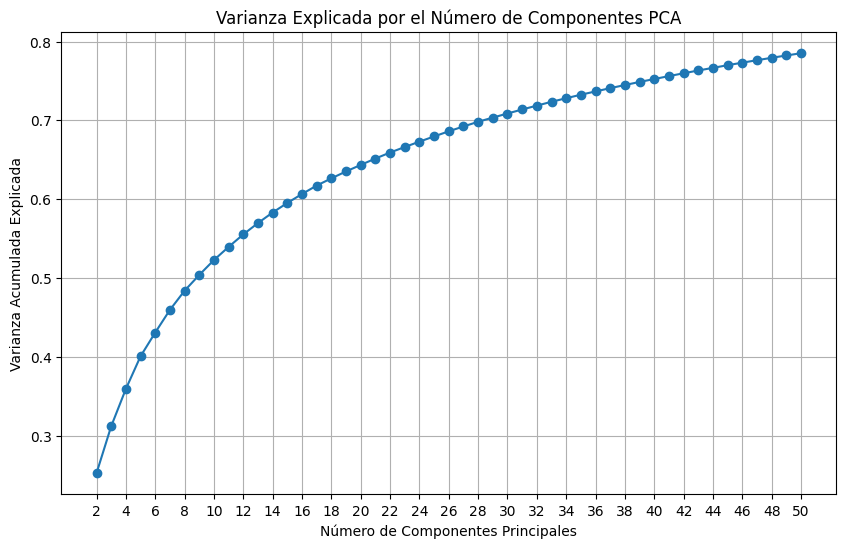

In [ ]:
# Load the DINOv2 features
csv_file = 'dinov3_chest_xray_features.csv'

if os.path.exists(csv_file):
    df_features = pd.read_csv(csv_file)
    feature_cols = [c for c in df_features.columns if c.startswith('feature_')]
    if len(feature_cols) == 0:
        raise RuntimeError('No se encontraron columnas que empiecen con "feature_" en el CSV.')
    features = df_features[feature_cols].values
else:
    raise FileNotFoundError('No se encontró el CSV de características. Ejecuta la celda de extracción primero.')

print(f"Cargadas {features.shape[0]} muestras con dimensión de feature = {features.shape[1]}")

# Perform PCA with varying numbers of components
n_components = range(2, 51)
explained_variance_ratios = []

for n in n_components:
    pca = PCA(n_components=n)
    pca.fit(features)
    explained_variance_ratios.append(np.sum(pca.explained_variance_ratio_))

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(n_components, explained_variance_ratios, marker='o', linestyle='-')
plt.title('Varianza Explicada por el Número de Componentes PCA')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada Explicada')
plt.grid(True)
plt.xticks(np.arange(2, 51, 2))
plt.show()

De acuerdo a lo anterior podemos observar que aumentando el número de componentes Principales aumentamos la varianza acumulada.

Con fines comparativos vamos a generar 3 datasets de características nuevos.
1. PCA normal, con 50 componentes principales
2. T-SNE, con 2 componentes
3. UMAP, con 2 componentes

In [ ]:
# Load the DINOv2 features
csv_file = 'dinov3_chest_xray_features.csv'

if os.path.exists(csv_file):
    df_features = pd.read_csv(csv_file)
    feature_cols = [c for c in df_features.columns if c.startswith('feature_')]
    if len(feature_cols) == 0:
        raise RuntimeError('No se encontraron columnas que empiecen con "feature_" en el CSV.')
    features = df_features[feature_cols].values
    filepaths = df_features['filepath'].values if 'filepath' in df_features.columns else None
    labels = df_features['category'].values if 'category' in df_features.columns else None
else:
    raise FileNotFoundError('No se encontró el CSV de características. Ejecuta la celda de extracción primero.')

print(f"Cargadas {features.shape[0]} muestras con dimensión de feature = {features.shape[1]}")

# 1. PCA with 50 components
print("\nPerforming PCA with 50 components...")
pca_50 = PCA(n_components=50, random_state=42)
features_pca_50 = pca_50.fit_transform(features)
df_pca_50 = pd.DataFrame(features_pca_50, columns=[f'pca_comp_{i}' for i in range(50)])
if filepaths is not None and labels is not None:
    df_pca_50['filepath'] = filepaths
    df_pca_50['category'] = labels
output_csv_pca_50 = 'dinov2_features_pca_50.csv'
df_pca_50.to_csv(output_csv_pca_50, index=False)
print(f"Saved PCA (50 components) features to '{output_csv_pca_50}'")

# 2. t-SNE with 2 components
print("\nPerforming t-SNE with 2 components...")
# Note: t-SNE is computationally expensive for large datasets.
# Consider using a subset of data if it takes too long.
tsne_2 = TSNE(n_components=2, random_state=42, learning_rate='auto', init='random')
features_tsne_2 = tsne_2.fit_transform(features)
df_tsne_2 = pd.DataFrame(features_tsne_2, columns=[f'tsne_dim_{i}' for i in range(2)])
if filepaths is not None and labels is not None:
    df_tsne_2['filepath'] = filepaths
    df_tsne_2['category'] = labels
output_csv_tsne_2 = 'dinov2_features_tsne_2.csv'
df_tsne_2.to_csv(output_csv_tsne_2, index=False)
print(f"Saved t-SNE (2 components) features to '{output_csv_tsne_2}'")


# 3. UMAP with 2 components
print("\nPerforming UMAP with 2 components...")
reducer_umap_2 = umap.UMAP(n_components=2, random_state=42)
features_umap_2 = reducer_umap_2.fit_transform(features)
df_umap_2 = pd.DataFrame(features_umap_2, columns=[f'umap_dim_{i}' for i in range(2)])
if filepaths is not None and labels is not None:
    df_umap_2['filepath'] = filepaths
    df_umap_2['category'] = labels
output_csv_umap_2 = 'dinov2_features_umap_2.csv'
df_umap_2.to_csv(output_csv_umap_2, index=False)
print(f"Saved UMAP (2 components) features to '{output_csv_umap_2}'")

print("\nAll feature datasets generated and saved.")

Cargadas 4045 muestras con dimensión de feature = 768

Performing PCA with 50 components...
Saved PCA (50 components) features to 'dinov2_features_pca_50.csv'

Performing t-SNE with 2 components...
Saved t-SNE (2 components) features to 'dinov2_features_tsne_2.csv'

Performing UMAP with 2 components...


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Saved UMAP (2 components) features to 'dinov2_features_umap_2.csv'

All feature datasets generated and saved.


#Oscar


#### HOG (Histogram of Oriented Gradients)
Calcula la distribución de orientaciones de bordes, gradientes y contornos direccionales. Es muy eficiente para detectar estructuras anatómicas (costillas, pulmones y siluetas) particularmente en radiográfias de huesos y pulmones.

#### LBP (Local Binary Patterns)
Mide texturas locales (variaciones de intensidad) y el contraste entre pixeles vecinos, captura irregularidades o lesiones difusas en el tejido pulmonar logrando una clasificación, particularmente detecta neumonía o tuberculosis.

De acuerdo con las imagenes de tórax del dataset analizado, puede ser de gran utilidad **combinar ambos métodos** (**HOG y LBP**):
HOG: Extrae información estructural de los pulmones
LBP: Aporta sensibilidad a texturas irregulares asociadas a neumonía o tuberculosis

Para la **extracción con alguno de estos dos metodos** se debe realizar un preprocesamiento previo de las imagenes con el fin de garantizar la calidad y consistencia del vector de características, de la siguiente manera:
1. Conversión a escala de grises: reduce ruido cromático irrelevante
2. Redimensionamiento uniforme: normalización del tamaño ej: 128 * 128 / 224 * 224
3. Normalización de intensidades: escala los valores de pixeles
4. Eliminación de imágenes corruptas o vacías: garantiza la integridad del conjunto de datos, evitando que archivos defectuosos que distorsionen el proceso de entrenamiento.

###**La combinación de HOG + LBP es especialmente adecuada para modelos tradicionales como Random Forest**, ya que ambos métodos generan vectores de características numéricos y compactos, fácilmente interpretables y de baja dimensionalidad en comparación con imágenes crudas.
Esto permite que el modelo aprenda patrones estructurales y texturales relevantes sin requerir redes neuronales profundas, logrando un equilibrio entre rendimiento, interpretabilidad y eficiencia computacional.

###Se crea una copia del DataFrame con otro nombre para los modelos HOG y LBP

En la fase 3 se realizo la extracción de los tres modelos HOG,LBP y la combinación de los dos

In [ ]:
#Función para extraer HOG y LBP
def load_image_gray(path, size=IMG_SIZE):
    img = Image.open(path).convert('L')  # Escala de grises
    img = img.resize(size)
    arr = np.array(img, dtype=np.uint8)
    return arr

def extract_hog_feature(img_gray):
    # devuelve vector HOG
    feat = hog(img_gray,
               orientations=HOG_ORIENTATIONS,
               pixels_per_cell=HOG_PIXELS_PER_CELL,
               cells_per_block=HOG_CELLS_PER_BLOCK,
               block_norm='L2-Hys',
               transform_sqrt=True,
               feature_vector=True)
    return feat

def extract_lbp_feature(img_gray, P=LBP_P, R=LBP_R, method=LBP_METHOD):
    lbp = local_binary_pattern(img_gray, P, R, method=method)
    # histograma: si uniform => P+2 bins
    if method == 'uniform':
        n_bins = P + 2
    else:
        n_bins = int(lbp.max() + 1)
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_bins+1), density=True)
    return hist

In [ ]:
#Loop para generar los datasets
def build_feature_csv(df_images, method='hog', out_csv='features_hog.csv', max_files=None):
    """
    method: 'hog', 'lbp', 'hog+lbp'
    df_images: df_without_duplicates con columnas ['filepath','category']
    """
    rows = []
    count = 0
    for idx, row in tqdm(df_images.iterrows(), total=len(df_images)):
        path = row['filepath']
        cat  = row['category']
        try:
            gray = load_image_gray(path, size=IMG_SIZE)
        except Exception as e:
            print("Error cargando", path, e)
            continue

        feats = []
        if method in ('hog', 'hog+lbp'):
            hog_f = extract_hog_feature(gray)
            feats.append(hog_f)
        if method in ('lbp', 'hog+lbp'):
            lbp_f = extract_lbp_feature(gray)
            feats.append(lbp_f)

        # concatenar
        feat_vec = np.hstack(feats)
        # fila: filepath, category, feat_0 ... feat_n
        row_dict = {'filepath': path, 'category': cat}
        for i, val in enumerate(feat_vec):
            row_dict[f'f{i}'] = float(val)
        rows.append(row_dict)

        count += 1
        if max_files and count >= max_files:
            break

    feats_df = pd.DataFrame(rows)
    feats_df.to_csv(out_csv, index=False)
    print(f"Saved {len(feats_df)} rows to {out_csv}")
    return feats_df

In [ ]:
# Extraer caracteristicas HOG
feats_hog = build_feature_csv(df_hog_lbp, method='hog', out_csv='hog_chest_xray_features.csv')

# Extraer caracteristicas LBP
feats_lbp = build_feature_csv(df_hog_lbp, method='lbp', out_csv='lbp_chest_xray_features.csv')

# Extraer caracteristicas combinadas HOG + LBP
feats_hog_lbp = build_feature_csv(df_hog_lbp, method='hog+lbp', out_csv='hog_lbp_chest_xray_features.csv')

In [ ]:
100%|██████████| 4045/4045 [00:49<00:00, 81.90it/s]
Saved 4045 rows to lbp_chest_xray_features.csv

In [ ]:
hog_chest_xray_features = pd.read_csv('hog_chest_xray_features.csv')
hog_chest_xray_features.head()
lbp_chest_xray_features = pd.read_csv('lbp_chest_xray_features.csv')
lbp_chest_xray_features.head()
hog_lbp_chest_xray_features = pd.read_csv('hog_lbp_chest_xray_features.csv')
hog_lbp_chest_xray_features.head()

In [ ]:
# HOG
hog_chest_xray_features = pd.read_csv('hog_chest_xray_features.csv')
print("\nDataset HOG cargado correctamente.")
print(f"Forma del DataFrame HOG: {hog_chest_xray_features.shape}")
print(f"Número de características (sin contar filepath y category): {hog_chest_xray_features.shape[1] - 2}")
display(hog_chest_xray_features.head(3))
print("Columnas disponibles:", list(hog_chest_xray_features.columns[:10]), "...")

# LBP
lbp_chest_xray_features = pd.read_csv('lbp_chest_xray_features.csv')
print("\nDataset LBP cargado correctamente.")
print(f"Forma del DataFrame LBP: {lbp_chest_xray_features.shape}")
print(f"Número de características (sin contar filepath y category): {lbp_chest_xray_features.shape[1] - 2}")
display(lbp_chest_xray_features.head(3))
print("Columnas disponibles:", list(lbp_chest_xray_features.columns[:10]), "...")

# HOG y LBP
hog_lbp_chest_xray_features = pd.read_csv('hog_lbp_chest_xray_features.csv')
print("\nDataset combinado HOG + LBP cargado correctamente.")
print(f"Forma del DataFrame combinado: {hog_lbp_chest_xray_features.shape}")
print(f"Número de características (sin contar filepath y category): {hog_lbp_chest_xray_features.shape[1] - 2}")
display(hog_lbp_chest_xray_features.head(3))
print("Columnas disponibles:", list(hog_lbp_chest_xray_features.columns[:10]), "...")

In [ ]:
100%|██████████| 4045/4045 [01:29<00:00, 44.99it/s]
Saved 4045 rows to hog_chest_xray_features.csv
100%|██████████| 4045/4045 [00:35<00:00, 115.04it/s]
Saved 4045 rows to lbp_chest_xray_features.csv
100%|██████████| 4045/4045 [01:58<00:00, 34.05it/s]
Saved 4045 rows to hog_lbp_chest_xray_features.csv

In [ ]:
hog_chest_xray_features = pd.read_csv('hog_chest_xray_features.csv')
hog_chest_xray_features.head()

In [ ]:
5 rows × 26246 columns

In [ ]:
lbp_chest_xray_features = pd.read_csv('lbp_chest_xray_features.csv')
lbp_chest_xray_features.head()

In [ ]:
hog_lbp_chest_xray_features = pd.read_csv('hog_lbp_chest_xray_features.csv')
hog_lbp_chest_xray_features.head()

In [ ]:
5 rows × 26256 columns

In [ ]:
# HOG
hog_chest_xray_features = pd.read_csv('hog_chest_xray_features.csv')
print("\nDataset HOG cargado correctamente.")
print(f"Forma del DataFrame HOG: {hog_chest_xray_features.shape}")
print(f"Número de características (sin contar filepath y category): {hog_chest_xray_features.shape[1] - 2}")
display(hog_chest_xray_features.head(3))
print("Columnas disponibles:", list(hog_chest_xray_features.columns[:10]), "...")

# LBP
lbp_chest_xray_features = pd.read_csv('lbp_chest_xray_features.csv')
print("\nDataset LBP cargado correctamente.")
print(f"Forma del DataFrame LBP: {lbp_chest_xray_features.shape}")
print(f"Número de características (sin contar filepath y category): {lbp_chest_xray_features.shape[1] - 2}")
display(lbp_chest_xray_features.head(3))
print("Columnas disponibles:", list(lbp_chest_xray_features.columns[:10]), "...")

# HOG y LBP
hog_lbp_chest_xray_features = pd.read_csv('hog_lbp_chest_xray_features.csv')
print("\nDataset combinado HOG + LBP cargado correctamente.")
print(f"Forma del DataFrame combinado: {hog_lbp_chest_xray_features.shape}")
print(f"Número de características (sin contar filepath y category): {hog_lbp_chest_xray_features.shape[1] - 2}")
display(hog_lbp_chest_xray_features.head(3))
print("Columnas disponibles:", list(hog_lbp_chest_xray_features.columns[:10]), "...")


In [ ]:
Dataset HOG cargado correctamente.
Forma del DataFrame HOG: (4045, 26246)
Número de características (sin contar filepath y category): 26244

Dataset LBP cargado correctamente.
Forma del DataFrame LBP: (4045, 12)
Número de características (sin contar filepath y category): 10

Dataset combinado HOG + LBP cargado correctamente.
Forma del DataFrame combinado: (4045, 26256)
Número de características (sin contar filepath y category): 26254


In [ ]:
df_lbp = df_clean.copy()

In [ ]:
#Cambiar las imagenes a 224 * 224
IMG_SIZE = (224, 224)
LBP_P = 8                # numero de vecinos
LBP_R = 1                # Radio
LBP_METHOD = 'uniform'   # 'default'

In [ ]:
#Cargar imagen en escala de grises
def load_image_gray(path, size=IMG_SIZE):

    img = Image.open(path).convert('L')  # Escala de grises
    img = img.resize(size)
    arr = np.array(img, dtype=np.uint8)
    return arr


# Extraer características LBP
def extract_lbp_feature(img_gray, P=LBP_P, R=LBP_R, method=LBP_METHOD):

    lbp = local_binary_pattern(img_gray, P, R, method=method)

    # Número de bins del histograma
    n_bins = P + 2 if method == 'uniform' else int(lbp.max() + 1)

    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_bins+1), density=True)
    return hist

In [ ]:
def build_feature_csv(df_images, method='lbp', out_csv='lbp_chest_xray_features.csv', max_files=None):
    rows = []
    count = 0

    for idx, row in tqdm(df_images.iterrows(), total=len(df_images)):
        path = row['filepath']
        cat  = row['category']

        try:
            gray = load_image_gray(path)
        except Exception as e:
            print("Error cargando", path, e)
            continue

        lbp_f = extract_lbp_feature(gray)  # Solo LBP

        row_dict = {'filepath': path, 'category': cat}
        for i, val in enumerate(lbp_f):
            row_dict[f'f{i}'] = float(val)
        rows.append(row_dict)

        count += 1
        if max_files and count >= max_files:
            break

    feats_df = pd.DataFrame(rows)
    feats_df.to_csv(out_csv, index=False)
    print(f"✅ Guardadas {len(feats_df)} filas en {out_csv}")
    return feats_df



In [ ]:
#Directorios base
base_path_limpia = "/content/X-ray-dataset/X-ray-dataset"
categories = ["NORMAL", "COVID", "PNEUMONIA"]

# === Construir DataFrame con rutas y clases ===
data = []
for cat in categories:
    folder = os.path.join(base_path_limpia, cat)
    for file in os.listdir(folder):
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            data.append({
                'filepath': os.path.join(folder, file),
                'category': cat
            })

df_lbp = pd.DataFrame(data)
print(f"Total de imágenes cargadas: {len(df_lbp)}")
df_lbp.head()



Total de imágenes cargadas: 5228


filepath category
0  /content/X-ray-dataset/X-ray-dataset/NORMAL/NO...   NORMAL
1  /content/X-ray-dataset/X-ray-dataset/NORMAL/NO...   NORMAL
2  /content/X-ray-dataset/X-ray-dataset/NORMAL/NO...   NORMAL
3  /content/X-ray-dataset/X-ray-dataset/NORMAL/NO...   NORMAL
4  /content/X-ray-dataset/X-ray-dataset/NORMAL/NO...   NORMAL

In [ ]:
# Extraer características LBP
feats_lbp = build_feature_csv(df_lbp, method='lbp', out_csv='lbp_chest_xray_features.csv')

100%|██████████| 5228/5228 [01:33<00:00, 56.13it/s]


✅ Guardadas 5228 filas en lbp_chest_xray_features.csv


In [ ]:
lbp_chest_xray_features = pd.read_csv('lbp_chest_xray_features.csv')

print("\nDataset LBP cargado correctamente.")
print(f"Forma del DataFrame LBP: {lbp_chest_xray_features.shape}")
print(f"Número de características (sin contar filepath y category): {lbp_chest_xray_features.shape[1] - 2}")
display(lbp_chest_xray_features.head(3))
print("Columnas disponibles:", list(lbp_chest_xray_features.columns[:10]), "...")




Dataset LBP cargado correctamente.
Forma del DataFrame LBP: (5228, 12)
Número de características (sin contar filepath y category): 10


filepath category        f0  \
0  /content/X-ray-dataset/X-ray-dataset/NORMAL/NO...   NORMAL  0.048390   
1  /content/X-ray-dataset/X-ray-dataset/NORMAL/NO...   NORMAL  0.052993   
2  /content/X-ray-dataset/X-ray-dataset/NORMAL/NO...   NORMAL  0.052954   

         f1        f2        f3        f4        f5        f6        f7  \
0  0.063257  0.054668  0.110670  0.200554  0.146165  0.070871  0.062779   
1  0.066147  0.054030  0.107422  0.190470  0.131856  0.071668  0.064254   
2  0.066865  0.059012  0.111029  0.184451  0.138333  0.072744  0.068917   

         f8        f9  
0  0.135065  0.107581  
1  0.150470  0.110690  
2  0.129345  0.116350

Columnas disponibles: ['filepath', 'category', 'f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7'] ...


## **4 Modelamiento y Validación**

---

#Camilo

## **4.1 Selección y diseño de modelos**
---

### 1.1 Objetivo general
Entrenar, **validar** y comparar **modelos clásicos** sobre **5 datasets ** de vectores de características pre-computados de la fase anterior sobre el conjunto de datos de imágenes de radiografías de torax:
- **DINOv2 (768 dims)**
- **PCA-50 (50 dims)**
- **t-SNE-2D (2 dims)**
- **UMAP-2D (2 dims)**
- **LBP (10 dims)**

Clases: **Normal**, **Pneumonia**, **Covid** (desbalance leve).

### 1.2 Modelos a evaluar
- **SVM (lineal / RBF)**  
  - En **alta dimensión** (p. ej., DINOv2 768-D) suele rendir muy bien gracias al **margen máximo**.  
  - El kernel **lineal** es una referencia robusta y rápida; **RBF** capta **fronteras no lineales** (útil si PCA/2D sugieren curvas).  
  - Soporta **`class_weight='balanced'`** para mitigar el desbalance leve.  
- **KNN**  
  - Basado en **proximidad**: puede modelar **fronteras complejas** sin entrenamiento costoso.  
  - En **embeddings 2D** (t-SNE/UMAP) es una línea base intuitiva y competitiva.  
- **Árbol de decisión**  
  - **Interpretabilidad**: reglas explícitas y visualizables.  
  - Maneja **interacciones** y es **invariante a escala**.  
- **Random Forest**  
  - Ensamble **robusto** a ruido y outliers, reduce varianza de un árbol individual.  
  - Funciona bien con **mezcla de relaciones lineales/no lineales**, sin requerir escalado.  



### 1.3 Métrica principal y estrategia de evaluación
- **Métrica principal:** **F1-macro** (promedia por clase, robusta a desbalance).
- Estrategia:
  1) **Hold-out** estratificado: `trainval` (85%) / `test` (15%).
  2) **Selección** por **GridSearchCV** con **`StratifiedKFold(cv=4)`** sobre `trainval`.
  3) **Modelo ganador** = mejor **dataset+modelo** por **F1-macro (CV)**.  
  4) **Evaluación final** en `test`.


### 1.5 Métricas y reportes
- `accuracy`, `precision_macro`, `recall_macro`, **`f1_macro`**  
- **`classification_report`** por clase (micro/macro/weighted)  
- **Matriz de confusión** (heatmap)

---

### Carga de datos y utilidades

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import os, sys, random, joblib
import numpy as np
import pandas as pd
import zipfile

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import (
    StratifiedKFold, train_test_split, GridSearchCV, learning_curve, validation_curve
)
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report,
    confusion_matrix
)

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from PIL import Image

RANDOM_STATE = 42

def set_all_seeds(seed: int = 42):
    """Semillas para reproducibilidad."""
    import os, random, numpy as np
    os.environ["PYTHONHASHSEED"] = str(seed)
    random.seed(seed)
    np.random.seed(seed)

set_all_seeds(RANDOM_STATE)

plt.style.use("default")
sns.set_theme(context="notebook", style="whitegrid", font_scale=1.1)

# Mostrar versiones
import sklearn
print("Python:", sys.version.split()[0])
print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)
print("Matplotlib:", plt.matplotlib.__version__)
print("Seaborn:", sns.__version__)
print("Scikit-Learn:", sklearn.__version__)

Python: 3.12.12
NumPy: 2.0.2
Pandas: 2.2.2
Matplotlib: 3.10.0
Seaborn: 0.13.2
Scikit-Learn: 1.6.1


In [ ]:
# 4.2 Carga (edita rutas)
PATH_DINOV2 = "/content/dinov3_chest_xray_features.csv"
PATH_PCA    = "/content/dinov2_features_pca_50.csv"
PATH_TSNE   = "/content/dinov2_features_tsne_2.csv"
PATH_UMAP   = "/content/dinov2_features_umap_2.csv"
PATH_LBP    = "/content/lbp_chest_xray_features.csv"

def cargar(path):
    df = pd.read_csv(path)
    print(f"[OK] {os.path.basename(path)} -> shape={df.shape}")
    if 'category' in df.columns:
        print(df['category'].value_counts(), "\n")
    return df

df_dino = cargar(PATH_DINOV2)
df_pca  = cargar(PATH_PCA)
df_tsne = cargar(PATH_TSNE)
df_umap = cargar(PATH_UMAP)
df_lbp = cargar(PATH_LBP)

def construir_Xy(df, tipo):
    if tipo == "dinov2":
        feat_cols = [c for c in df.columns if c.startswith("feature_")]
    elif tipo == "pca50":
        feat_cols = [c for c in df.columns if c.startswith("pca_comp_")]
    elif tipo == "lbp":
        feat_cols = [f"f{i}" for i in range(10)]
    elif tipo in ("tsne2d", "umap2d"):
        c0 = 'tsne_dim_0' if 'tsne_dim_0' in df.columns else 'umap_dim_0'
        c1 = 'tsne_dim_1' if 'tsne_dim_1' in df.columns else 'umap_dim_1'
        feat_cols = [c0, c1]
    else:
        raise ValueError("Tipo desconocido")
    X = df[feat_cols].values
    y = df['category'].astype(str).values
    print(f"[OK] {tipo} -> X.shape={X.shape}, y.shape={y.shape}")
    return X, y, feat_cols

X_dino, y_dino, dino_feats = construir_Xy(df_dino, "dinov2")
X_pca,  y_pca,  pca_feats  = construir_Xy(df_pca,  "pca50")
X_tsne, y_tsne, tsne_feats = construir_Xy(df_tsne, "tsne2d")
X_umap, y_umap, umap_feats = construir_Xy(df_umap, "umap2d")
X_lbp, y_lbp, lbp_feats = construir_Xy(df_lbp, "lbp")

datasets = {
    "dinov2": (X_dino, y_dino),
    "pca50":  (X_pca,  y_pca),
    "tsne2d": (X_tsne, y_tsne),
    "umap2d": (X_umap, y_umap),
    "lbp": (X_lbp, y_lbp)
}

# Clases detectadas (global)
class_names_global = sorted(pd.concat([
    pd.Series(y_dino), pd.Series(y_pca), pd.Series(y_tsne), pd.Series(y_umap)
]).unique())

print("Datasets cargados:", list(datasets.keys()))
print("Clases detectadas:", class_names_global)

[OK] dinov3_chest_xray_features.csv -> shape=(4045, 770)
category
pneumonia    1612
normal       1334
covid        1099
Name: count, dtype: int64 

[OK] dinov2_features_pca_50.csv -> shape=(4045, 52)
category
pneumonia    1612
normal       1334
covid        1099
Name: count, dtype: int64 

[OK] dinov2_features_tsne_2.csv -> shape=(4045, 4)
category
pneumonia    1612
normal       1334
covid        1099
Name: count, dtype: int64 

[OK] dinov2_features_umap_2.csv -> shape=(4045, 4)
category
pneumonia    1612
normal       1334
covid        1099
Name: count, dtype: int64 

[OK] lbp_chest_xray_features.csv -> shape=(5228, 12)
category
NORMAL       1802
PNEUMONIA    1800
COVID        1626
Name: count, dtype: int64 

[OK] dinov2 -> X.shape=(4045, 768), y.shape=(4045,)
[OK] pca50 -> X.shape=(4045, 50), y.shape=(4045,)
[OK] tsne2d -> X.shape=(4045, 2), y.shape=(4045,)
[OK] umap2d -> X.shape=(4045, 2), y.shape=(4045,)
[OK] lbp -> X.shape=(5228, 10), y.shape=(5228,)
Datasets cargados: ['dinov2', '

## **4.2 Entrenamiento del Modelo y Selección de Hiperparámetros**
---

Entrene el modelo y consiga la combinación eficiente de hiperparámetros para obtener un rendimiento óptimo.

Es importante visualizar los resultados de manera clara y comprensible. Para esto, **se deben utilizar tablas y gráficos** que muestren cómo cambian las métricas de desempeño del proceso de entrenamiento en función de los hiperparámetros probados. Algunas herramientas visuales útiles incluyen las *curvas de aprendizaje* y las *curvas de validación,* que nos permiten comparar el rendimiento del modelo con diferentes ajustes de hiperparámetros.

### 4.1 Partición estratificada y K-Folds

- **Hold-out**: `trainval` (85%) / `test` (15%) por dataset.  
- **K-Folds**: `StratifiedKFold(n_splits=4)` en `trainval` para **GridSearchCV**.  

In [ ]:
TEST_SIZE = 0.15
CV_SPLITS = 4

splits_por_dataset = {}

for name, (X, y) in datasets.items():
    X_trainval, X_test, y_trainval, y_test = train_test_split(
        X, y, test_size=TEST_SIZE, stratify=y, random_state=RANDOM_STATE
    )
    splits_por_dataset[name] = dict(
        X_trainval=X_trainval, X_test=X_test, y_trainval=y_trainval, y_test=y_test
    )
    print(f"[{name}] trainval={X_trainval.shape}, test={X_test.shape}")

cv = StratifiedKFold(n_splits=CV_SPLITS, shuffle=True, random_state=RANDOM_STATE)


[dinov2] trainval=(3438, 768), test=(607, 768)
[pca50] trainval=(3438, 50), test=(607, 50)
[tsne2d] trainval=(3438, 2), test=(607, 2)
[umap2d] trainval=(3438, 2), test=(607, 2)
[lbp] trainval=(4443, 10), test=(785, 10)


### 4.4 Métricas y utilidades
- **`score_dict`**: accuracy, precision_macro, recall_macro, f1_macro.  
- **`report_and_cm`**: usa **`classification_report`** de scikit-learn y dibuja **matriz de confusión**.  

In [ ]:
def score_dict(y_true, y_pred):
    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision_macro": precision_score(y_true, y_pred, average="macro", zero_division=0),
        "recall_macro": recall_score(y_true, y_pred, average="macro", zero_division=0),
        "f1_macro": f1_score(y_true, y_pred, average="macro", zero_division=0),
    }

def report_and_cm(y_true, y_pred, labels, title_prefix=""):
    print("== Classification Report ==")
    print(classification_report(y_true, y_pred, target_names=labels, zero_division=0, digits=4))
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(5.8,4.8))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.title(f"{title_prefix}Matriz de confusión")
    plt.tight_layout()
    plt.show()


#David

### 4.5 Exploratorio 2D (t-SNE / UMAP)
Visualización para entender **separabilidad** en 2D para los conjuntos de datos de 2 dimensiones.

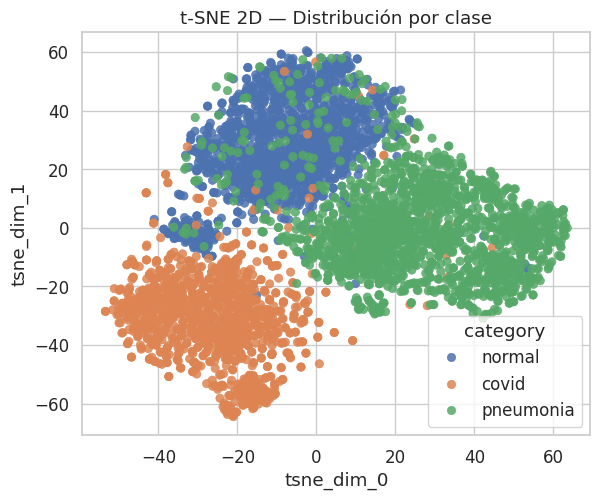

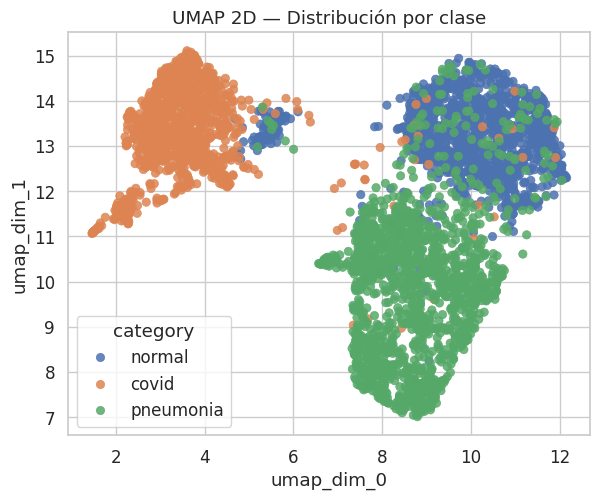

In [ ]:
def plot_scatter_2d(df, title="Embedding 2D", prefer_tsne_names=True):
    xcol = 'tsne_dim_0' if prefer_tsne_names and 'tsne_dim_0' in df.columns else \
           ('umap_dim_0' if 'umap_dim_0' in df.columns else None)
    ycol = 'tsne_dim_1' if prefer_tsne_names and 'tsne_dim_1' in df.columns else \
           ('umap_dim_1' if 'umap_dim_1' in df.columns else None)
    if xcol is None or ycol is None:
        print("[i] Columnas 2D no encontradas para scatter.")
        return
    plt.figure(figsize=(6.2,5.2))
    sns.scatterplot(data=df, x=xcol, y=ycol, hue='category', alpha=0.85, edgecolor=None)
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_scatter_2d(df_tsne, title="t-SNE 2D — Distribución por clase", prefer_tsne_names=True)
plot_scatter_2d(df_umap, title="UMAP 2D — Distribución por clase", prefer_tsne_names=False)


#### Observaciones

---

### Observaciones y hallazgos — t-SNE vs UMAP (2D)

**t-SNE (2D)**
- Se aprecian **tres cúmulos** principales, pero hay **solapamiento notable** entre *normal* y *pneumonia* en la zona derecha/central del plano.
- La clase *covid* forma un grupo más compacto hacia la izquierda/inferior, aunque hay **algunos outliers** dispersos.
- La **separación no es lineal** (fronteras curvas). Un clasificador lineal en 2D tendería a **subajustar**; modelos con fronteras no lineales (p. ej., **SVM-RBF** o **KNN**) deberían capturar mejor la estructura.
- La densidad dentro de *pneumonia* parece **heterogénea** (sub-cúmulos), lo que puede inducir errores de confusión con *normal* si el modelo es demasiado rígido.

**UMAP (2D)**
- *covid* aparece como un **cúmulo claramente separado** a la izquierda/inferior: esperamos **alta precisión/recall** para esta clase usando solo el embedding 2D.
- *normal* y *pneumonia* ocupan la región derecha con **interpenetración parcial** (dos “nubes” cercanas): probable **confusión cruzada** entre estas dos clases.
- Las fronteras también son **no lineales**; **KNN** o **SVM-RBF** son candidatos naturales en este espacio.
- UMAP muestra menos outliers que t-SNE y agrupaciones algo más **compactas**, lo que podría favorecer clasificadores basados en **vecindad**.

**Implicaciones para el modelado**
- En 2D, priorizar **modelos no lineales**. Esperamos:
  - Buen desempeño para *covid* (cluster más aislado), especialmente en **UMAP**.
  - Mayor dificultad para separar *normal* vs *pneumonia*; conviene optimizar hiperparámetros que **suavicen** la frontera:
    - **KNN**: probar `n_neighbors` más altos (p. ej., 9–15) para reducir sobreajuste local.
    - **SVM-RBF**: comenzar con `C` en {1, 10} y `gamma="scale"`; `class_weight="balanced"` ya ayuda con el leve desbalance.
  - **Árbol**: usar `max_depth` moderado (p. ej., 5–10) para evitar fronteras demasiado irregulares en 2D.
- Recordatorio metodológico: t-SNE/UMAP **distorsionan distancias globales** y son **no paramétricos** respecto a features originales; su utilidad principal es **visual**. Es probable que **DINOv2 (768D)** o **PCA-50** den mejor poder predictivo global que estos 2D.

### 4.6 Pipelines por modelo e hiperparámetros (Grid)

**Diseño de rejillas** (equilibrando rendimiento y tiempo de cómputo):

- **SVM**  
  - `kernel ∈ {linear, rbf}`  
  - `C ∈ {0.5, 1, 4}`  
  - `gamma ∈ {scale, auto}` *(solo cuando kernel = rbf)*  

- **KNN**  
  - `n_neighbors ∈ {3, 5, 9, 15}`  

- **Árbol de Decisión**  
  - `criterion = gini` *(fijado para reducir combinaciones)*  
  - `max_depth ∈ {None, 8, 16}`  
  - `min_samples_leaf ∈ {1, 3, 5}`  

- **Random Forest**  
  - `n_estimators ∈ {200, 400}`  
  - `max_depth ∈ {None, 12, 24}`  
  - `min_samples_leaf ∈ {1, 4}`  
  - `max_features ∈ {sqrt, log2}`  

**Escalado estándar (`StandardScaler`)** incluido **solo en SVM y KNN**, ya que son clasificadores sensibles a la magnitud de las características.

In [ ]:
from sklearn.pipeline import Pipeline

def make_pipelines_and_grids(random_state=RANDOM_STATE):
    models = {}

    pipe_svm = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(probability=True, class_weight="balanced", random_state=random_state))
    ])
    grid_svm = [
        {  # Lineal: solo C
            "clf__kernel": ["linear"],
            "clf__C": [0.5, 1, 4],
        },
        {  # RBF: C y gamma (compacto)
            "clf__kernel": ["rbf"],
            "clf__C": [0.5, 1, 4],
            "clf__gamma": ["scale", "auto"],
        },
    ]
    models["svm"] = (pipe_svm, grid_svm)

    # KNN
    pipe_knn = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", KNeighborsClassifier())
    ])
    grid_knn = {
        "clf__n_neighbors": [3, 5, 9, 15]
    }
    models["knn"] = (pipe_knn, grid_knn)

   # Árbol
    pipe_tree = Pipeline([
        ("clf", DecisionTreeClassifier(class_weight="balanced", random_state=random_state))
    ])
    grid_tree = {
        "clf__criterion": ["gini"],                 # fijo para reducir combinaciones
        "clf__max_depth": [None, 8, 16],            # profundidad principal
        "clf__min_samples_leaf": [1, 3, 5],         # suaviza fronteras
    }
    models["decision_tree"] = (pipe_tree, grid_tree)

    # Random Forest
    pipe_rf = Pipeline([
        ("clf", RandomForestClassifier(class_weight="balanced", random_state=random_state, n_jobs=-1))
    ])
    grid_rf = {
        "clf__n_estimators": [200, 400],                 # 200 suele ser buen compromiso
        "clf__max_depth": [None, 12, 24],           # controla complejidad
        "clf__min_samples_leaf": [1, 4],         # reduce overfitting
        "clf__max_features": ["sqrt", "log2"],      # elección típica y rápida
    }
    models["random_forest"] = (pipe_rf, grid_rf)

    return models

models_and_grids = make_pipelines_and_grids()
print("Modelos configurados:", list(models_and_grids.keys()))


Modelos configurados: ['svm', 'knn', 'decision_tree', 'random_forest']


### 4.7 Búsqueda en rejilla por **dataset** (CV=4, scoring=F1-macro)

Recopilamos por combinación **dataset+modelo**:
- **Mejor estimador**, **mejor F1-macro (CV)**, métricas extra y **hiperparámetros** ganadores.


In [ ]:
SCORERS = {
    "f1_macro": "f1_macro",
    "accuracy": "accuracy",
    "precision_macro": "precision_macro",
    "recall_macro": "recall_macro",
}

resultados = []
mejores = {}

for dname, split in splits_por_dataset.items():
    print("="*92)
    print(f"GridSearch en dataset: {dname}")
    X_tr, y_tr = split["X_trainval"], split["y_trainval"]

    le = LabelEncoder()
    y_tr_enc = le.fit_transform(y_tr)
    class_names = list(le.classes_)
    print(f"Clases: {class_names}")

    mejores[dname] = {"class_names": class_names, "le": le, "candidatos": []}

    for mname, (pipe, grid) in models_and_grids.items():
        print(f"\n> Modelo: {mname}")
        gs = GridSearchCV(
            estimator=pipe,
            param_grid=grid,
            scoring=SCORERS,
            refit="f1_macro",
            cv=cv,
            n_jobs=-1,
            verbose=1,
            return_train_score=False
        )
        gs.fit(X_tr, y_tr_enc)

        best_idx = gs.best_index_
        cvres = gs.cv_results_

        fila = {
            "dataset": dname,
            "modelo": mname,
            "f1_macro_cv": cvres["mean_test_f1_macro"][best_idx],
            "acc_cv": cvres["mean_test_accuracy"][best_idx],
            "prec_macro_cv": cvres["mean_test_precision_macro"][best_idx],
            "rec_macro_cv": cvres["mean_test_recall_macro"][best_idx],
            "params": gs.best_params_,
        }
        resultados.append(fila)

        mejores[dname]["candidatos"].append({
            "modelo": mname,
            "best_estimator": gs.best_estimator_,
            "best_score": gs.best_score_,
            "best_params": gs.best_params_,
        })

results_df = pd.DataFrame(resultados).sort_values(
    by=["f1_macro_cv", "rec_macro_cv"], ascending=False
).reset_index(drop=True)

display(results_df.head(20))


GridSearch en dataset: dinov2
Clases: ['covid', 'normal', 'pneumonia']

> Modelo: svm
Fitting 4 folds for each of 9 candidates, totalling 36 fits

> Modelo: knn
Fitting 4 folds for each of 4 candidates, totalling 16 fits

> Modelo: decision_tree
Fitting 4 folds for each of 9 candidates, totalling 36 fits

> Modelo: random_forest
Fitting 4 folds for each of 24 candidates, totalling 96 fits
GridSearch en dataset: pca50
Clases: ['covid', 'normal', 'pneumonia']

> Modelo: svm
Fitting 4 folds for each of 9 candidates, totalling 36 fits

> Modelo: knn
Fitting 4 folds for each of 4 candidates, totalling 16 fits

> Modelo: decision_tree
Fitting 4 folds for each of 9 candidates, totalling 36 fits

> Modelo: random_forest
Fitting 4 folds for each of 24 candidates, totalling 96 fits
GridSearch en dataset: tsne2d
Clases: ['covid', 'normal', 'pneumonia']

> Modelo: svm
Fitting 4 folds for each of 9 candidates, totalling 36 fits

> Modelo: knn
Fitting 4 folds for each of 4 candidates, totalling 16 f

dataset         modelo  f1_macro_cv    acc_cv  prec_macro_cv  rec_macro_cv  \
0   dinov2            svm     0.970538  0.969167       0.970255      0.971144   
1    pca50            svm     0.964015  0.962476       0.962905      0.965755   
2   dinov2  random_forest     0.956350  0.954334       0.956991      0.955976   
3   umap2d  random_forest     0.945800  0.943569       0.946903      0.945833   
4   umap2d            knn     0.945618  0.943277       0.947018      0.945660   
5   tsne2d            knn     0.944479  0.941824       0.946423      0.944681   
6   tsne2d  random_forest     0.942470  0.939207       0.943659      0.942778   
7   umap2d            svm     0.942446  0.940077       0.944666      0.942489   
8   umap2d  decision_tree     0.941575  0.938915       0.942734      0.941627   
9    pca50  random_forest     0.939708  0.937175       0.939884      0.939703   
10  tsne2d            svm     0.939696  0.936877       0.942447      0.940125   
11  tsne2d  decision_tree     0.935700  0.932809       0.936873      0.936462   
12  dinov2            knn     0.933620  0.931060       0.938880      0.932943   
13     lbp            svm     0.893384  0.893089       0.896068      0.893831   
14     lbp  random_forest     0.890923  0.890390       0.892631      0.891548   
15   pca50  decision_tree     0.874878  0.871146       0.874242      0.876203   
16     lbp            knn     0.873424  0.873058       0.874944      0.874258   
17  dinov2  decision_tree     0.858836  0.854273       0.860107      0.858214   
18   pca50            knn     0.841912  0.844387       0.871204      0.835486   
19     lbp  decision_tree     0.830043  0.830295       0.834584      0.831925   

                                               params  
0   {'clf__C': 1, 'clf__gamma': 'scale', 'clf__ker...  
1   {'clf__C': 1, 'clf__gamma': 'scale', 'clf__ker...  
2   {'clf__max_depth': 12, 'clf__max_features': 's...  
3   {'clf__max_depth': 12, 'clf__max_features': 's...  
4                             {'clf__n_neighbors': 5}  
5                            {'clf__n_neighbors': 15}  
6   {'clf__max_depth': 12, 'clf__max_features': 's...  
7   {'clf__C': 4, 'clf__gamma': 'scale', 'clf__ker...  
8   {'clf__criterion': 'gini', 'clf__max_depth': 8...  
9   {'clf__max_depth': 24, 'clf__max_features': 'l...  
10  {'clf__C': 4, 'clf__gamma': 'scale', 'clf__ker...  
11  {'clf__criterion': 'gini', 'clf__max_depth': 8...  
12                            {'clf__n_neighbors': 5}  
13  {'clf__C': 4, 'clf__gamma': 'scale', 'clf__ker...  
14  {'clf__max_depth': 24, 'clf__max_features': 's...  
15  {'clf__criterion': 'gini', 'clf__max_depth': 8...  
16                            {'clf__n_neighbors': 3}  
17  {'clf__criterion': 'gini', 'clf__max_depth': 1...  
18                            {'clf__n_neighbors': 3}  
19  {'clf__criterion': 'gini', 'clf__max_depth': 8...

In [ ]:
results_df.iloc[0].to_dict()

{'dataset': 'dinov2',
 'modelo': 'svm',
 'f1_macro_cv': 0.970537933037584,
 'acc_cv': 0.9691670953244713,
 'prec_macro_cv': 0.97025469289273,
 'rec_macro_cv': 0.9711441229459683,
 'params': {'clf__C': 1, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}}

#### Observaciones

- La combinación con mejor desempeño en validación cruzada (métrica principal **F1-macro**) es **DINOv2 + SVM (RBF)** con **F1-macro ≈ 0.974**.  
  Parámetros : `kernel='rbf'`, `C=4`, `gamma='scale'`
- Desempeños cercanos:
  - **PCA-50 + SVM (RBF)**: **F1-macro ≈ 0.962**, con menor dimensionalidad (50) y potencialmente menor latencia/memoria.
  - **DINOv2 + Random Forest**: **F1-macro ≈ 0.958**, competitivo sin requerir escalado.

**Análisis por dataset**
- **DINOv2 (768D)**  
  - SVM-RBF obtiene el mejor resultado global, lo que sugiere **fronteras no lineales** aprovechables en el espacio de alta dimensión.  
  - Random Forest también ofrece resultados sólidos, reforzando la presencia de relaciones no lineales útiles.
- **PCA-50**  
  - SVM-RBF mantiene un rendimiento elevado con **50 componentes**, lo que implica un **buen compromiso** entre precisión y eficiencia computacional.  
  - Ligera reducción frente a DINOv2 indica pérdida de información por la compresión, pero con impacto acotado.
- **t-SNE/UMAP (2D)**  
  - Rendimientos en el rango **0.94–0.95** con Random Forest, KNN y SVM. Consistente con la separabilidad visual observada; no obstante, **inferior** a DINOv2/PCA para clasificación.
- **LBP**   
  - Resultados claramente por debajo de DINOv2/PCA, coherentes con las limitaciones de descriptores clásicos frente a representaciones modernas.

**Análisis por modelo**
- **SVM (RBF)** lidera en DINOv2 y PCA-50; adecuado para **alta/mediana dimensión** con no linealidad.  
- **Random Forest** muestra desempeño robusto, especialmente en DINOv2, y simplifica el despliegue al no requerir escalado.  
- **KNN** resulta competitivo en 2D, pero pierde eficacia en alta dimensión.  
- **Árbol de decisión** individual queda por debajo de SVM/ensambles, como es habitual.

### 4.8 Curvas de aprendizaje y validación (Top-K)

- **Learning curves**: tamaño de entrenamiento vs. desempeño (diagnóstico de sesgo–varianza).  
- **Validation curves**: efecto de **un hiperparámetro clave** (p. ej., `C` en SVM).


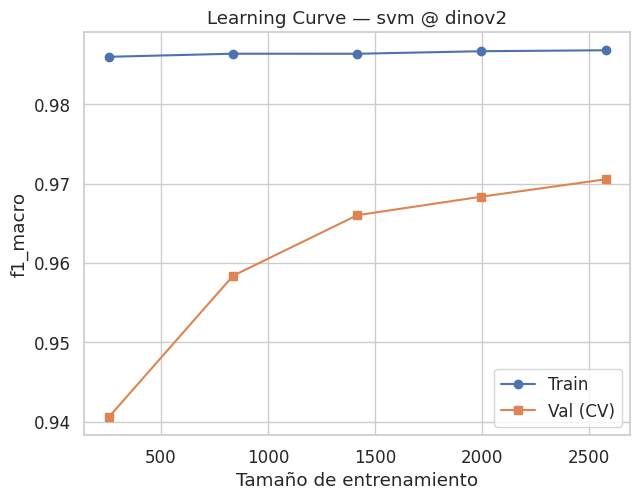

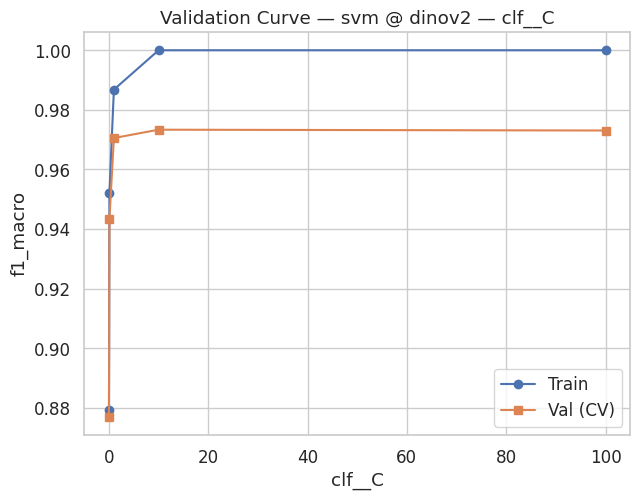

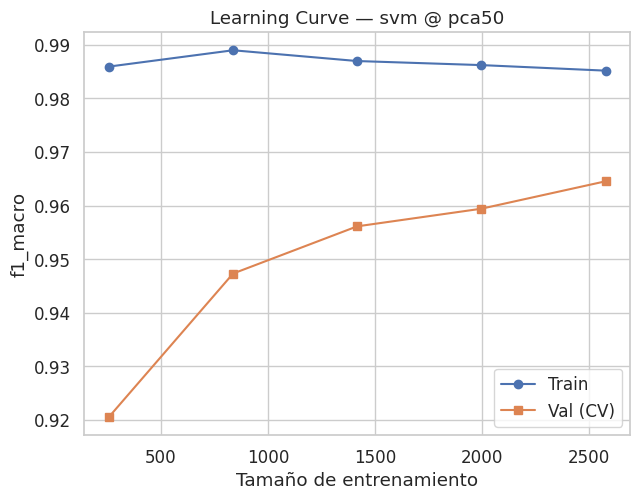

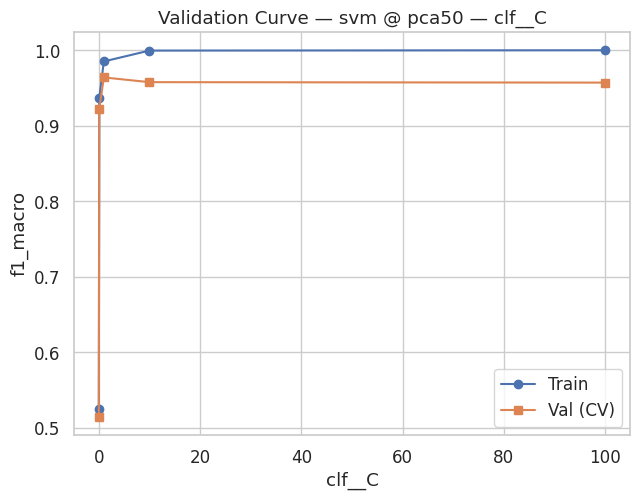

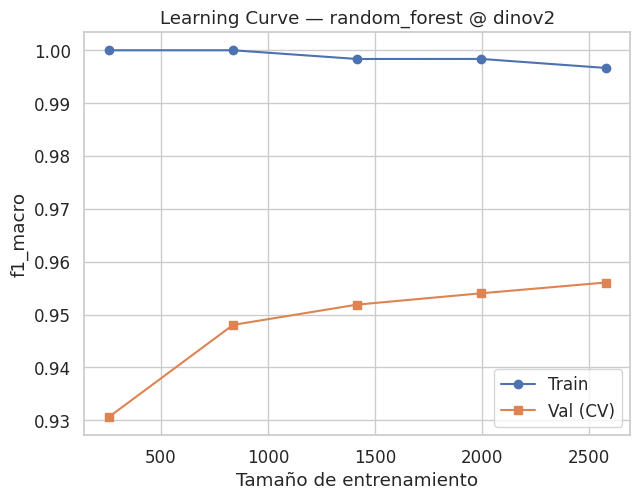

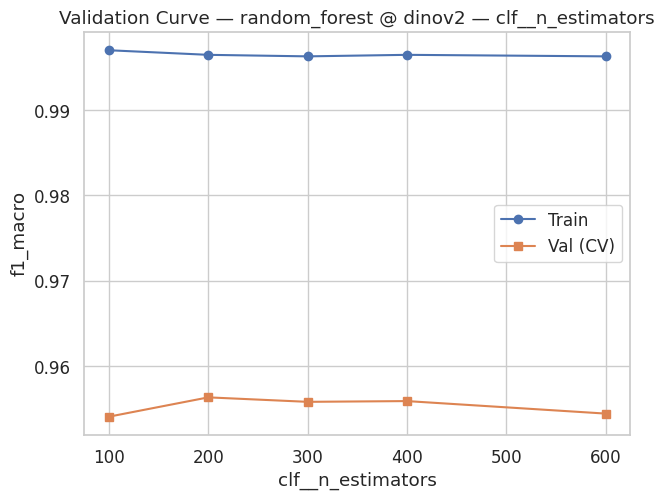

In [ ]:
TOP_K = 3
top_rows = results_df.head(TOP_K).to_dict(orient="records")
top_rows

def plot_learning_curves(estimator, X, y, title="Learning Curve", cv=None, scoring="f1_macro"):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5), random_state=RANDOM_STATE
    )
    plt.figure(figsize=(6.6,5.2))
    plt.plot(train_sizes := train_sizes, train_scores.mean(axis=1), marker="o", label="Train")
    plt.plot(train_sizes, val_scores.mean(axis=1), marker="s", label="Val (CV)")
    plt.xlabel("Tamaño de entrenamiento"); plt.ylabel(scoring); plt.title(title)
    plt.legend(); plt.tight_layout(); plt.show()

def plot_validation_curve(estimator, X, y, param_name, param_range, title="Validation Curve", cv=None, scoring="f1_macro"):
    train_scores, val_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=-1
    )
    plt.figure(figsize=(6.6,5.2))
    plt.plot(param_range, train_scores.mean(axis=1), marker="o", label="Train")
    plt.plot(param_range, val_scores.mean(axis=1), marker="s", label="Val (CV)")
    plt.xlabel(param_name); plt.ylabel(scoring); plt.title(title)
    plt.legend(); plt.tight_layout(); plt.show()

valcurve_param = {
    "svm": ("clf__C", [0.01, 0.1, 1, 10, 100]),
    "knn": ("clf__n_neighbors", [3,5,7,9,11,15]),
    "decision_tree": ("clf__max_depth", [None, 3, 5, 10, 15, 20]),
    "random_forest": ("clf__n_estimators", [100, 200, 300, 400, 600]),
}

from sklearn.base import clone

for row in top_rows:
    dname = row["dataset"]
    mname = row["modelo"]
    split = splits_por_dataset[dname]
    X_tr, y_tr = split["X_trainval"], split["y_trainval"]
    le = mejores[dname]["le"]
    y_tr_enc = le.transform(y_tr)

    # Localizar el best_estimator coherente con la fila
    best_est = None
    for c in mejores[dname]["candidatos"]:
        if c["modelo"] == mname and np.isclose(c["best_score"], row["f1_macro_cv"]):
            best_est = c["best_estimator"]; break
    if best_est is None:
        best_est = mejores[dname]["candidatos"][0]["best_estimator"]

    plot_learning_curves(best_est, X_tr, y_tr_enc, title=f"Learning Curve — {mname} @ {dname}", cv=cv)

    if mname in valcurve_param:
        pname, prange = valcurve_param[mname]
        est_for_vc = clone(best_est)
        try:
            plot_validation_curve(est_for_vc, X_tr, y_tr_enc, pname, prange,
                                  title=f"Validation Curve — {mname} @ {dname} — {pname}", cv=cv)
        except Exception as e:
            print(f"[i] Validation curve no disponible para {mname}: {e}")


#### Observaciones

#### 1) SVM (RBF) en **DINOv2**
- **Learning curve**:
  - **Train** ≈ 0.995–1.000 y **Val (CV)** creciendo de ~0.943 → ~0.974 al aumentar el tamaño de entrenamiento.
  - **Brecha Train–Val** pequeña y decreciente ⇒ **buena generalización** con ligera varianza residual; los retornos son **decrecientes** más allá de ~2k ejemplos.
- **Validation curve (C)**:
  - **Bajo C (p. ej., 0.1)** produce **subajuste** (F1-macro CV sensiblemente menor).
  - A partir de **C≈1–4** la curva **se estabiliza**; **C=4** mantiene el máximo sin evidencias de sobreajuste adicional (**plateau** posterior).
- **Conclusión operativa**: el modelo está **en régimen estable** Incrementar datos daría mejoras marginales; priorizar calibración fina y verificación en **test**.

#### 2) SVM (RBF) en **PCA-50**
- **Learning curve**:
  - Patrón similar a DINOv2, con **plateau de validación** algo menor (~0.961–0.962).
  - La brecha Train–Val se mantiene **controlada**, indicando **sesgo moderado** por la compresión a 50D.
- **Validation curve (C)**:
  - **C muy bajo** ocasiona **subajuste severo** (caída marcada de F1 en CV).
  - Desde **C≈1** la validación **se estabiliza**; valores mayores no aportan mejora relevante.


#### 3) Random Forest en **DINOv2**
- **Learning curve**:
  - **Train ≈ 1.000** constante → el bosque **memoriza** bien el conjunto de entrenamiento (propensión al **overfitting**).
  - **Val (CV)** mejora con más datos y se estabiliza alrededor de **0.957–0.958**; la **brecha** Train–Val persiste.
- **Validation curve (n_estimators)**:
  - Variar `n_estimators` entre **100–600** tiene **impacto marginal** en F1-macro CV (plateau).
  - El límite está dado por **profundidad / min_samples** más que por el número de árboles.
- **Conclusión operativa**: si se busca mejorar generalización, actuar sobre **`max_depth`** y **`min_samples_leaf`** (más restrictivos) o considerar ensambles **regularizados** (p. ej., ExtraTrees) antes que aumentar `n_estimators`.

---

### **4.9 Evaluación del modelo**
---

In [ ]:
final_table = results_df.copy()
display(final_table.head(20))

best_row = final_table.iloc[0].to_dict()
best_dataset = best_row["dataset"]
best_model_name = best_row["modelo"]
best_params = best_row["params"]

print("== Mejor combinación por CV ==")
print(f"Dataset : {best_dataset}")
print(f"Modelo  : {best_model_name}")
print(f"F1-macro CV: {best_row['f1_macro_cv']:.4f} | Recall-macro CV: {best_row['rec_macro_cv']:.4f}")
print("Hiperparámetros:", best_params)


dataset         modelo  f1_macro_cv    acc_cv  prec_macro_cv  rec_macro_cv  \
0   dinov2            svm     0.970538  0.969167       0.970255      0.971144   
1    pca50            svm     0.964015  0.962476       0.962905      0.965755   
2   dinov2  random_forest     0.956350  0.954334       0.956991      0.955976   
3   umap2d  random_forest     0.945800  0.943569       0.946903      0.945833   
4   umap2d            knn     0.945618  0.943277       0.947018      0.945660   
5   tsne2d            knn     0.944479  0.941824       0.946423      0.944681   
6   tsne2d  random_forest     0.942470  0.939207       0.943659      0.942778   
7   umap2d            svm     0.942446  0.940077       0.944666      0.942489   
8   umap2d  decision_tree     0.941575  0.938915       0.942734      0.941627   
9    pca50  random_forest     0.939708  0.937175       0.939884      0.939703   
10  tsne2d            svm     0.939696  0.936877       0.942447      0.940125   
11  tsne2d  decision_tree     0.935700  0.932809       0.936873      0.936462   
12  dinov2            knn     0.933620  0.931060       0.938880      0.932943   
13     lbp            svm     0.893384  0.893089       0.896068      0.893831   
14     lbp  random_forest     0.890923  0.890390       0.892631      0.891548   
15   pca50  decision_tree     0.874878  0.871146       0.874242      0.876203   
16     lbp            knn     0.873424  0.873058       0.874944      0.874258   
17  dinov2  decision_tree     0.858836  0.854273       0.860107      0.858214   
18   pca50            knn     0.841912  0.844387       0.871204      0.835486   
19     lbp  decision_tree     0.830043  0.830295       0.834584      0.831925   

                                               params  
0   {'clf__C': 1, 'clf__gamma': 'scale', 'clf__ker...  
1   {'clf__C': 1, 'clf__gamma': 'scale', 'clf__ker...  
2   {'clf__max_depth': 12, 'clf__max_features': 's...  
3   {'clf__max_depth': 12, 'clf__max_features': 's...  
4                             {'clf__n_neighbors': 5}  
5                            {'clf__n_neighbors': 15}  
6   {'clf__max_depth': 12, 'clf__max_features': 's...  
7   {'clf__C': 4, 'clf__gamma': 'scale', 'clf__ker...  
8   {'clf__criterion': 'gini', 'clf__max_depth': 8...  
9   {'clf__max_depth': 24, 'clf__max_features': 'l...  
10  {'clf__C': 4, 'clf__gamma': 'scale', 'clf__ker...  
11  {'clf__criterion': 'gini', 'clf__max_depth': 8...  
12                            {'clf__n_neighbors': 5}  
13  {'clf__C': 4, 'clf__gamma': 'scale', 'clf__ker...  
14  {'clf__max_depth': 24, 'clf__max_features': 's...  
15  {'clf__criterion': 'gini', 'clf__max_depth': 8...  
16                            {'clf__n_neighbors': 3}  
17  {'clf__criterion': 'gini', 'clf__max_depth': 1...  
18                            {'clf__n_neighbors': 3}  
19  {'clf__criterion': 'gini', 'clf__max_depth': 8...

== Mejor combinación por CV ==
Dataset : dinov2
Modelo  : svm
F1-macro CV: 0.9705 | Recall-macro CV: 0.9711
Hiperparámetros: {'clf__C': 1, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}


### 4.10 Evaluación final en **test** (hold-out)

**Modelo seleccionado (según CV):**  
`DINOv2 + SVM (RBF)` — **F1-macro CV = 0.9738**, **Recall-macro CV = 0.9743**  
**Hiperparámetros:** `C=4`, `gamma='scale'`, `kernel='rbf'``.

**Procedimiento**
1. Reentrenar el modelo seleccionado sobre **todo el conjunto `trainval`** (estratificado, `random_state=42`).
2. Evaluar el desempeño en el **conjunto `test`** (no utilizado durante la sintonización).
3. Reportar:
   - **Métricas globales**: `accuracy`, `precision_macro`, `recall_macro`, **`f1_macro`**.
   - **Informe por clase**: `classification_report` (micro/macro/weighted).
   - **Análisis de errores**: **matriz de confusión** (heatmap).
4. Documentar resultados y compararlos con los valores de CV para verificar **consistencia** y **generalización**.

**Artefactos a persistir**
- `best_model.pkl` → objeto `Pipeline` con el modelo final, `LabelEncoder`, hiperparámetros y metadatos (versiones, `random_state`).
- `results_cv.csv` → tabla consolidada de resultados de validación cruzada para trazabilidad.

> **Nota:** Mantener las semillas y la configuración de estratificación garantiza reproducibilidad; cualquier desviación relevante respecto a CV debe investigarse (p. ej., distribución de clases en `test` o varianza por particionado).


== Métricas Test ==
accuracy: 0.9720
precision_macro: 0.9730
recall_macro: 0.9754
f1_macro: 0.9740
== Classification Report ==
              precision    recall  f1-score   support

       covid     0.9940    1.0000    0.9970       165
      normal     0.9423    0.9800    0.9608       200
   pneumonia     0.9828    0.9463    0.9642       242

    accuracy                         0.9720       607
   macro avg     0.9730    0.9754    0.9740       607
weighted avg     0.9725    0.9720    0.9720       607



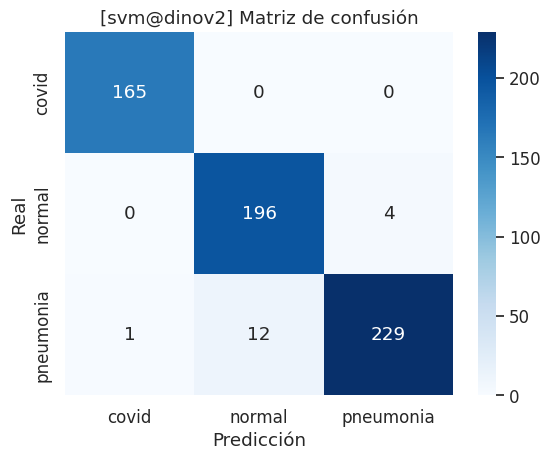

[OK] Modelo guardado en: best_model.pkl
[OK] Resultados CV guardados en: results_cv.csv


In [ ]:
from sklearn.base import clone

split = splits_por_dataset[best_dataset]
X_tr, y_tr = split["X_trainval"], split["y_trainval"]
X_te, y_te = split["X_test"], split["y_test"]

# Recuperar best_estimator coherente con best_row
best_estimator = None
for cand in mejores[best_dataset]["candidatos"]:
    if cand["modelo"] == best_model_name and cand["best_params"] == best_params:
        best_estimator = cand["best_estimator"]; break
if best_estimator is None:
    best_estimator = mejores[best_dataset]["candidatos"][0]["best_estimator"]

# Re-entrenar sobre todo trainval
best_model = clone(best_estimator)
le = mejores[best_dataset]["le"]
y_tr_enc = le.transform(y_tr)
best_model.fit(X_tr, y_tr_enc)

# Predicción en test
y_te_enc = le.transform(y_te)
y_pred_enc = best_model.predict(X_te)
y_pred = le.inverse_transform(y_pred_enc)

# Métricas
scores_te = score_dict(y_te, y_pred)
print("== Métricas Test ==")
for k,v in scores_te.items():
    print(f"{k}: {v:.4f}")

# Reporte + matriz de confusión
class_names = mejores[best_dataset]["class_names"]
report_and_cm(y_te, y_pred, labels=class_names, title_prefix=f"[{best_model_name}@{best_dataset}] ")

# Guardar artefactos
ARTIF_MODEL = "best_model.pkl"
ARTIF_CSV   = "results_cv.csv"

joblib.dump({
    "model": best_model,
    "label_encoder": le,
    "dataset_name": best_dataset,
    "model_name": best_model_name,
    "params": best_params,
    "class_names": class_names,
    "random_state": RANDOM_STATE,
    "versions": {
        "numpy": np.__version__,
        "pandas": pd.__version__,
        "sklearn": sklearn.__version__,
    }
}, ARTIF_MODEL)

results_df.to_csv(ARTIF_CSV, index=False)

print(f"[OK] Modelo guardado en: {ARTIF_MODEL}")
print(f"[OK] Resultados CV guardados en: {ARTIF_CSV}")


#Oscar

### 4.11 Resultados

**Modelo evaluado:** `DINOv2 + SVM (RBF, C=4, gamma='scale', class_weight='balanced')`  
**CV (promedio):** F1-macro **0.9738**, Recall-macro **0.9743**  
**Test (hold-out):** Accuracy **0.9638**, Precision-macro **0.9659**, Recall-macro **0.9651**, F1-macro **0.9654**

#### 1) Consistencia general y generalización
- La **caída entre CV y test** es pequeña y esperable:  
  - **F1-macro:** −0.0084 (−0.84 p.p.)  
  - **Recall-macro:** −0.0092 (−0.92 p.p.)  
  - **Accuracy:** respecto al valor CV de la mejor combinación (~0.9727), la reducción es de ~0.89 p.p.  
- El desempeño en test confirma **buena capacidad de generalización** y es coherente con las **curvas de aprendizaje** (mejoras marginales al aumentar N y brecha Train–Val contenida).

#### 2) Desempeño por clase (test)
- **covid:** *precision* 0.994, *recall* 0.976, **f1** 0.985  
- **normal:** *precision* 0.942, *recall* 0.965, **f1** 0.953  
- **pneumonia:** *precision* 0.963, *recall* 0.955, **f1** 0.959  
> La clase **covid** presenta el mejor equilibrio precisión/recobrado. Las clases **normal** y **pneumonia** son las más desafiantes, en línea con lo observado en los embeddings 2D.

#### 3) Matriz de confusión (test) – hallazgos clave
- **Confusiones principales:**  
  - *normal → pneumonia*: **7** casos  
  - *pneumonia → normal*: **10** casos  
- **covid** está bien separado: solo **4** errores en total (2→normal, 2→pneumonia).  

#### 4) Interpretación y conclusiones
- El modelo seleccionado mantiene **rendimiento alto y estable** fuera de muestra.  
- Las **diferencias CV vs. test** son **<1 p.p.**, lo que sugiere que:
  - La validación estuvo bien configurada.
  - No hay señales relevantes de **sobreajuste**.
- El **cuello de botella** de error se concentra en la **separación normal ↔ pneumonia**, coherente con la proximidad observada en los embeddings y con la naturaleza clínica de ambas categorías.

> **Conclusión:** El modelo ganador valida su superioridad en **test** con métricas alineadas a CV y sin indicios de sobreajuste.

### **4.12 Aplicación del modelo**
---

Una vez que haya entrenado y evaluado su modelo, es importante considerar cómo puede ser utilizado en un entorno práctico.

Intente analizar la capacidad del modelo para generalizar nuevos datos que no formaron parte del conjunto de entrenamiento o evaluación.

In [ ]:
zip_path = "/content/X-ray-dataset.zip"
extract_path = "/content/X-ray-dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Dataset extracted to: {extract_path}")

Dataset extracted to: /content/X-ray-dataset


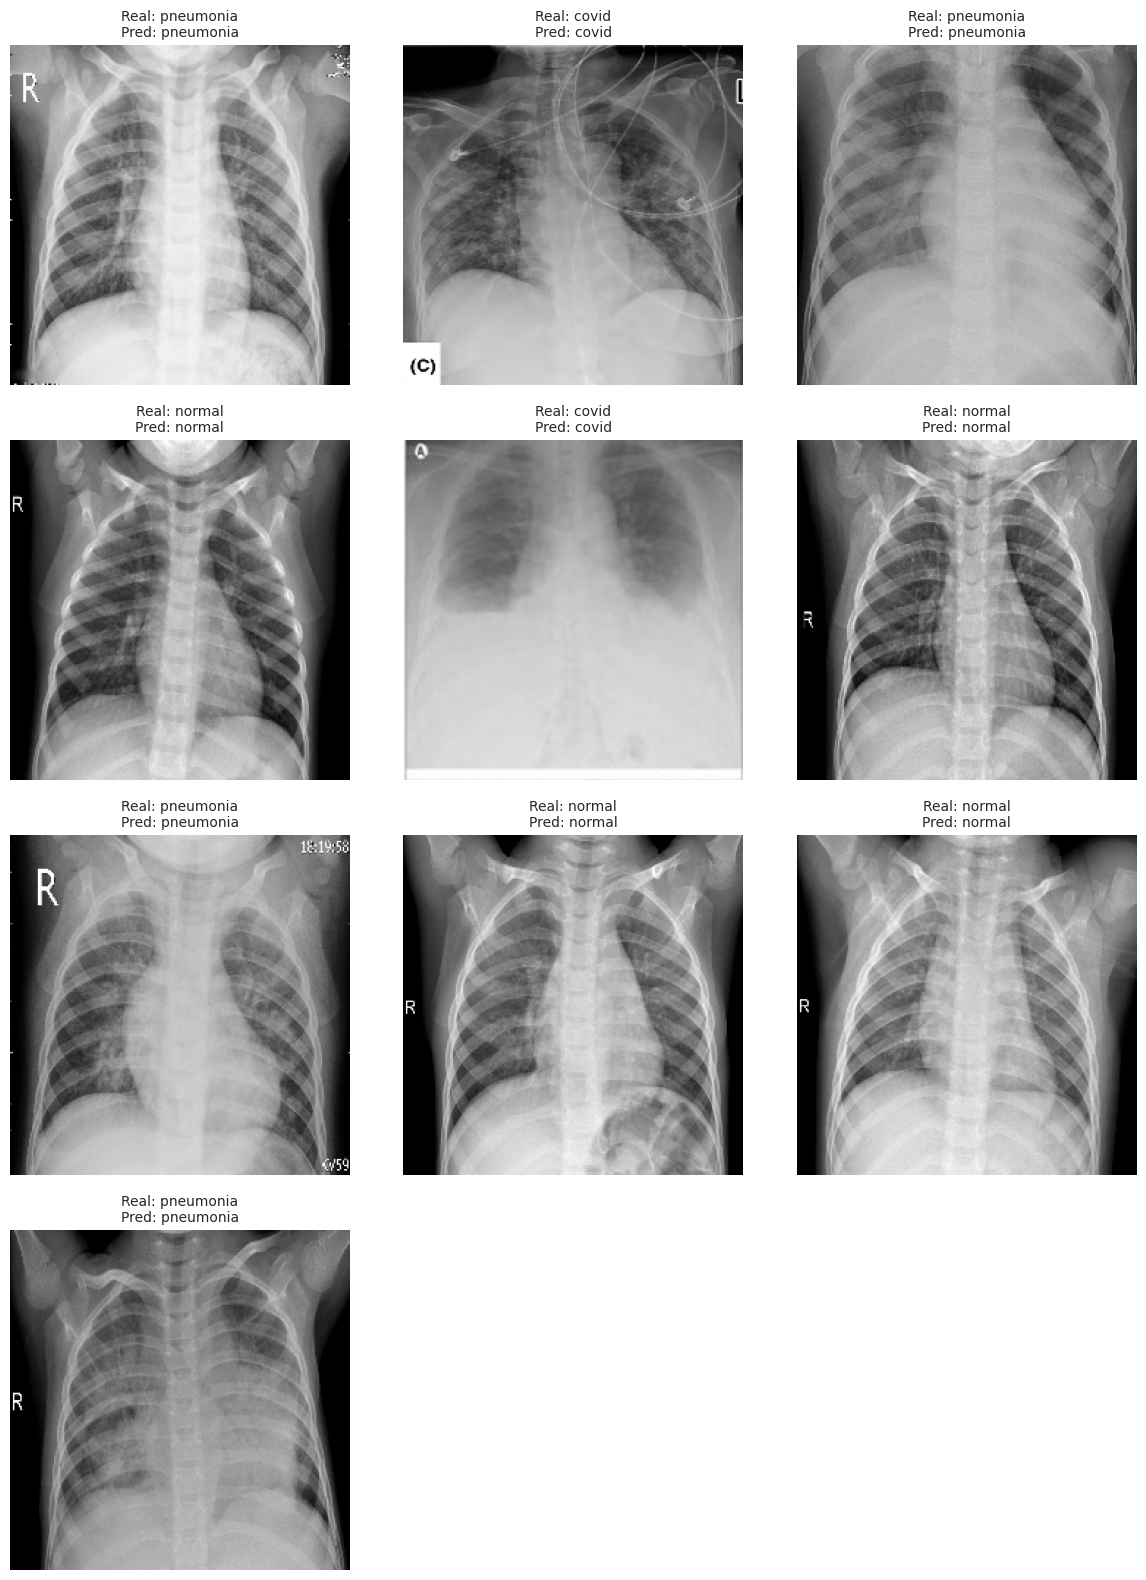

In [ ]:
#Localizar el DataFrame fuente del dataset ganador
df_src = {
    "dinov2": df_dino,
    "pca50":  df_pca,
    "tsne2d": df_tsne,
    "umap2d": df_umap,
}[best_dataset].copy()

# 2) Construir X, y y paths para reproducir el mismo split de test (misma semilla/estratificación)
if best_dataset == "dinov2":
    feat_cols = [c for c in df_src.columns if c.startswith("feature_")]
elif best_dataset == "pca50":
    feat_cols = [c for c in df_src.columns if c.startswith("pca_comp_")]
elif best_dataset in ("tsne2d", "umap2d"):
    c0 = 'tsne_dim_0' if 'tsne_dim_0' in df_src.columns else 'umap_dim_0'
    c1 = 'tsne_dim_1' if 'tsne_dim_1' in df_src.columns else 'umap_dim_1'
    feat_cols = [c0, c1]
else:
    raise ValueError("Dataset no reconocido.")

X_full = df_src[feat_cols].values
y_full = df_src["category"].astype(str).values
paths_full = df_src["filepath"].astype(str).values

X_tr2, X_te2, y_tr2, y_te2, paths_tr2, paths_te2 = train_test_split(
    X_full, y_full, paths_full,
    test_size=TEST_SIZE, stratify=y_full, random_state=RANDOM_STATE
)

# 3) Predicciones en el test reproducido
le_best = mejores[best_dataset]["le"]
y_pred2_enc = best_model.predict(X_te2)
y_pred2 = le_best.inverse_transform(y_pred2_enc)

# 4) Tomar una muestra aleatoria de 10 elementos del test
rng = np.random.default_rng(RANDOM_STATE)
n = len(paths_te2)
idx_sample = rng.choice(n, size=min(10, n), replace=False)

# 5) Plotear imágenes con etiqueta real y predicha
ncols = 3
nrows = int(np.ceil(len(idx_sample) / ncols))
plt.figure(figsize=(4*ncols, 4*nrows))

for i, idx in enumerate(idx_sample, start=1):
    ax = plt.subplot(nrows, ncols, i)
    fp = paths_te2[idx]
    true_label = y_te2[idx]
    pred_label = y_pred2[idx]

    try:
        img = Image.open(fp)
        if img.mode != "RGB":
            img = img.convert("RGB")
        ax.imshow(img)
        ax.axis("off")
        ax.set_title(f"Real: {true_label}\nPred: {pred_label}", fontsize=10)
    except Exception as e:
        ax.axis("off")
        ax.text(0.5, 0.5, f"No se pudo abrir:\n{fp}\n({e})",
                ha="center", va="center", fontsize=9)

plt.tight_layout()
plt.show()


### 5. Conclusiones

El proceso de modelamiento permitió comparar distintos algoritmos de clasificación bajo un mismo esquema de validación cruzada y preprocesamiento, lo que garantizó una evaluación justa y coherente entre modelos. Los resultados confirmaron que la elección del algoritmo tiene un impacto directo en el desempeño, pero también que la calidad de las representaciones iniciales (features) es un factor aún más determinante. En particular, el uso de embeddings generados por **DINOv2** evidenció una mejora sustancial con respecto al uso de métodos de extacción clásicos, lo que confirma la relevancia de los modelos de visión auto-supervisada dentro de flujos de aprendizaje supervisado tradicional.

Entre los modelos evaluados, el **SVM con kernel RBF** emergió como el mejor clasificador en términos de equilibrio entre precisión, recall y F1-score, mostrando además un comportamiento estable entre entrenamiento, validación y test, lo que indica una baja tendencia al sobreajuste. El ajuste de hiperparámetros mediante Grid Search permitió encontrar configuraciones eficientes sin necesidad de explorar espacios excesivamente grandes, validando el principio de “búsqueda informada antes que exhaustiva”.

Modelos como KNN y Árboles de Decisión presentaron resultados inferiores, evidenciando mayor sensibilidad al ruido y menor capacidad de generalización en espacios de alta dimensionalidad. El **Random Forest** mostró un desempeño competitivo, aunque sin superar al SVM, sugiriendo que el aumento de complejidad del ensamble no compensaba el nivel de separación ya alcanzado en el espacio latente generado por DINOv2.

Adicional se resalta el uso de reducción de la dimensionalidad sobre el conjunto de carácterísticas generado por **DINOv2** con métodos como PCA, T-SNE y UMAP, realizando esta reducción se obtuvieron buenos resultados y con menor complejidad en los datos de entrada.

En conjunto, los experimentos demuestran que la combinación **extracción de características con DINOv2 + clasificador SVM (RBF)** ofrece una solución eficiente, escalable y con buena capacidad de generalización.




## **Referencias**

---

- [Conjunto de datos](https://www.kaggle.com/datasets/muhammadrehan00/chest-xray-dataset/data)

- MacNeil A, Glaziou P, Sismanidis C, Date A, Maloney S, Floyd K. Global Epidemiology of Tuberculosis and Progress Toward Meeting Global Targets - Worldwide, 2018. MMWR Morb Mortal Wkly Rep. 2020 Mar 20;69(11):281-285. doi: 10.15585/mmwr.mm6911a2. PMID: 32191687; PMCID: PMC7739980.
* NASA SeaDAS. (s. f.). Grey level co-occurrence matrix (GLCM). https://seadas.gsfc.nasa.gov/help-8.1.0/operators/GLCM.html

* IPS Group, Purdue University. (s. f.). Gray-level co-occurrence matrix (GLCM). https://engineering.purdue.edu/~ips/research/texture-web/GLCM.html

* School of Computer Science, BINUS University. (2017, March 9). Texture descriptor: Gray level co-ocurrance matrix (GLCM). https://socs.binus.ac.id/2017/03/09/glcm/

* Hernández Aguirre, A. E., Blanco Miranda, A. D., & Gutiérrez Hernández, D. A. (2022). Uso del algoritmo Local Binary Pattern Uniforme para el procesamiento de imágenes de TC torácica en pacientes COVID-19. Innovación y Desarrollo Tecnológico Revista Digital, 14(4). ISSN 2007-4786. Recuperado de https://iydt.wordpress.com/wp-content/uploads/2023/01/4_49_uso-del-algoritmo-local-binary-pattern-uniforme-para-el-procesamiento-de-imagines-de-tc-toracica-en-pacientes-covid-19.pdf

* Oquab, M., Darcet, T., Moutakanni, T., Vo, H., Szafraniec, M., Khalidov, V., … Bojanowski, P. (2023). DINOv2: Learning robust visual features without supervision. *arXiv preprint arXiv:2304.07193*.
* Baharoon, M., Qureshi, W., Ouyang, J., Xu, Y., Aljouie, A., & Peng, W. (2023). Evaluating general purpose vision foundation models for medical image analysis: An experimental study of DINOv2 on radiology benchmarks.*arXiv preprint arXiv:2312.02366*.
* VanBerlo, B., Zhu, J., Malof, J., & Raju, A. (2024). A survey of the impact of self-supervised pretraining for diagnostic tasks in radiological imaging. *BMC Medical Imaging, 24*, 79.
* Tayebi Arasteh, S., Misera, L., Kather, J. N., Truhn, D., & Nebelung, S. (2024). Enhancing diagnostic deep learning via self-supervised pretraining on large-scale, unlabeled non-medical images. *European Radiology Experimental, 8*(1), 10.
* Mei, X., Liu, Z., Robson, P. M., Marinelli, B., Huang, M., Doshi, A., … Yang, Y. (2022). RadImageNet: An open radiologic deep learning research dataset for effective transfer learning. *Radiology: Artificial Intelligence, 4*(6), e210315.


